# Chapter 4 - Calculus  (An intro to the zoo of functions via SageMath)

---

##### 4.1.   <span style='color:#009688'>Introduction to Polynomials \(Evaluation and Division\)</span>

##### 4.2.   <span style='color:#009688'>Interpolation and applications</span>

##### 4.3.   <span style='color:#009688'>Limits of sequences and functions</span>

##### 4.4.   <span style='color:#009688'>Continuous functions and applications</span>

##### 4.5.   <span style='color:#009688'>Derivatives</span>

##### 4.6.   <span style='color:#009688'>Elementary theorems on derivatives</span>

##### 4.7.   <span style='color:#009688'>Series</span>

##### 4.8.   <span style='color:#009688'>Taylor series</span>

##### 4.9.   <span style='color:#009688'>Integration</span>


---

This  chapter is devoted to introductory notions from calculus and analysis.
In calculus the fundamental objects that we deal with  are functions. 

Below we begin with material   on polynomial functions. Recall that a function $P(x)$ is called polynomial, if it has the form
$$
P(x)=a_{n}x^{n}+a_{n-1}x^{n-1}+\cdots+a_{1}x+a_{0}
$$
where $n$ is a nonnegative integer, and the numbers $a_0$,  $a_1$, $\ldots$, $a_n$  are constants, called
the coefficients of the polynomial. If the leading coefficient $a_{n}$ is non\-zero, $a_{n}\neq 0$, then $n$ is called the degree of  $P$.
For example, a line $f(x)=ax+b$ with slope $a\neq 0$ is a polynomial of degree 1, hence such a polynomial is a linear function. On the other hand, a quadratic function \(parabola\) $g(x)=ax^2+bx+c$, with $a\neq 0$ is a polynomial of degree 2. 

SageMath provides an enjoyable framework to study functions and their applications, and the same applies for polynomials.  We   begin with an important
notion in the theory of polynomials, the so\-called $\mathbb{polynomial \ interpolation}$, having a variety of interesting applications in numerical analysis \(numerical methods, and hence also to other sciences\).



## 4.1.   <span style='color:#009688'>Introduction to Polynomials \(Evaluation and Division\)</span>

As we proncounced in this section we will focus on interpolation of polynomials. As we will verify below,  for most of the cases that we are interested in, Sage succesfully applies and simplifies the computations in such procedures (as most of the mathematical
packages, e.g., Mathematica, Matlab or Maple). Nowadays it is well know  that such packages become essentiall
for realizing the   beauty of numerical methods. Therefore, we should expect that most of them contain well-fixed routines  to treat interpolation methods,
and our goal below is to describe the situation for SageMath (at least, and this has many similarities with the implementation in Mathematica   of polynomial interpolation).

The first series of exercises is about a classical topic, namely the classical Horner scheme, which is about the  division of polynomials with applications
in their evaluation.

---



#### <span style='color:#2196f3'>Example</span>

Given the polynomial 
$$ p(x)=\sum _{i=0}^{n}a_{i}x^{i}=a_{0}+a_{1}x+a_{2}x^{2}+a_{3}x^{3}+\cdots +a_{n}x^{n} = $$
$$ \quad = a_{0}+x (a_{1}+x ( a_{2}+x(a_{3}+\cdots +x(a_{n-1}+x a_{n})\cdots ))) $$

define coefficients $b_i$ as follows:

\begin{aligned}b_{n}&:=a_{n}\\b_{n-1}&:=a_{n-1}+b_{n}x_{0}\\ & \dots \quad \quad \quad &  \\ b_{1} &:=a_{1}+b_{2}x_{0}\\b_{0}&:=a_{0}+b_{1}x_{0}\end{aligned}

Then 
$$ p(x)=(b_{1}+b_{2}x+b_{3}x^{2}+b_{4}x^{3}+\cdots +b_{n-1}x^{n-2}+b_{n}x^{n-1})(x-x_{0})+b_{0}, $$
and it follows that
$$ p(x_0) = b_0. $$Let us now use a bit of programming in Sage, in order to  implement   the situation. 


In [1]:
def horner_division(p, x0):
    '''p is the list of coeficients starting from degree 0'''
    n = len(p)
    b = [0] * (n-1)
    a = p[n-1]
    for i in range(n-2, -1, -1):
        # i goes from n - 2 to 0
        b[i] = a
        a = p[i] + x0*a
    return b, a

# example
# p(x) = 1 + 2*x - 3*x**2 + x**3
p = [1, 2, -3, 1]
x0 = 2
q, b0 = horner_division(p, x0)
print("Quotient:", q)
print("Remainder:", b0)

Quotient: [0, -1, 1]
Remainder: 1


In other words,
$$ x^3 - 3x^2 + 2x + 1 = (x^2 - x)(x - 2) + 1 $$

#### <span style='color:#2196f3'>**Exercise**</span>

Use the routine ${\tt{horner\_division}}$ constructed above,  to determine  all roots of the polynomial $ p(x) = x^3 + 103x^2 + 187x - 1515$.

#### Solution:



In [2]:
p = [-1515.0, 187.0, 103.0, 1.0]
# start by testing small integer values of x0
x0 = -1
q, r = horner_division(p, x0)
print(q, r)

[85.0000000000000, 102.000000000000, 1.00000000000000] -1600.00000000000


#### <span style='color:#2096f3'>Remark</span>

We can perform algebraic operations on polynomials in python using the 'numpy' library.



In [3]:
from numpy.polynomial.polynomial import polymul, polydiv, polyadd, polypow
p = polymul(polymul([101,1],[-3,1]),[5,1])
print(p)

# coeficients of (1 + x)^n are binomial coefficients
q = polypow([1,1], 10)
print(q)


[-1.515e+03  1.870e+02  1.030e+02  1.000e+00]
[  1.  10.  45. 120. 210. 252. 210. 120.  45.  10.   1.]


## 4.2.  <span style='color:#009688'>Interpolation and applications</span>

Often, we may  have some data but  the function $f(x)$ that generates  the data  is unknown. In such problems we try to fit a  certain class of functions to the data. The process of fitting a function to some given data is called interpolation.
The most usual class of functions for such a procedure are  the polynomials \(this is because polynomials  have the nice property of approximating any continuous function \-\- Weierstrass Approximation Theorem\).  The process of fitting a polynomial through given data is called $\mathit{polynomial \ interpolation}$.  The next series of exercises is about the so\-called  $\mathit{Lagrange \ interpolation \ polynomials}$.  The Lagrange interpolation method provides a direct approach for determining interpolated values regardless of the data points spacing, that is, it can be fitted to unequally spaced or equally spaced data.

---



#### <span style='color:#607d8b'>1\) Lagrange interpolation</span>

Consider some distinct points $x_0,  x_1, \ldots, x_{n}$ (for simplicity you may think these points as real numbers).  Next we want to find  a polynomial $P(x)$ of degree not greater than $n$, which takes a prescribed value $y_i$ at $x_i$, for all $i=0, 1, \ldots, n$.  Such a polynomial is given by $P(x)=y_0\ell_0(x)+\cdots+y_n\ell_{n}(x)$, with  
$$
\ell_{i}(x)=\frac{(x-x_0)\cdots(x-x_{i-1})(x-x_{i+1})\cdots(x-x_{n})}{(x_{i}-x_{0})\cdots(x_{i}-x_{i-1})(x_{i}-x_{i+1})\cdots(x_{i}-x_{n})}
$$
for any $i=0, 1, \ldots, n$. Since we have $\ell_{i}(x_i)=1$ and $\ell_{i}(x_j)=0$ for any $i\neq j$, it follows that
$$
P(x_i)=y_i \ \quad \forall i=0, 1, \ldots, n.
$$

The polynomial  $P(x)$ is known as the Lagrange interpolation polynomial, 
while the  polynomials $\ell_{i}$  are called  elementary  Lagrange polynomials.

For instance:

$\bullet$  If  two points $(x_0, y_0)$, $(x_1, y_1)$ are given then one has $n=1$ and 
$P(x)=y_{0}\ell_{0}(x)+y_{1}\ell_{1}(x)$ with
$$
\ell_{0}(x)=\frac{x-x_1}{x_0-x_1}\,,\quad \ell_1(x)=\frac{x-x_0}{x_1-x_0}\,.
$$
$\bullet$ for $n=2$ and some given points $x_0, x_1, x_2$ 
the polynomials $\ell_0, \ell_1, \ell_2$ are given respectively
by
\begin{eqnarray*}
\ell_{0}(x)&=&\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}\,,\\
\ell_{1}(x)&=&\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}\,,\\
\ell_{2}(x)&=&\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}\,.
\end{eqnarray*}

In an analogous way are treated the cases with $n=3, 4$, etc.
If $y_{i}=f(x_i)$ for some  function $f$, then $P(x)$ is referred to as the  
Lagrange interpolation polynomial for $f$. 

---



#### <span style='color:#2196f3'>**Exercise \(Lagrange interpolation polynomial\)**</span>

Using  polynomial interpolation, present an approximate formula of the sine function, using the  
known  values of $\sin$  at the points $0$, $\frac{\pi}{6}$, $\frac{\pi}{4}$, $\frac{\pi}{3}$, $\frac{\pi}{2}$.
Make a plot comparing the interpolation polynomial with $\sin(x)$.



##### Solution

We have the table
$$
x: \quad 0 \quad  \pi/6 \quad  \pi/4 \quad  \pi/3 \quad  \pi/2 \\
y: \quad 0 \quad  1/2 \quad  \sqrt2/2 \quad  \sqrt3/2 \quad  1\,.
$$ 
Thus by applying the method based on elementary Lagrange polynomials we can compute the interpolation polunomial $P(x)$ for the sin function. In SageMath this goes as follows:

0.0287971124604161*x^4 - 0.204340696021654*x^3 + 0.0213730075288600*x^2 + 0.995626184275262*x

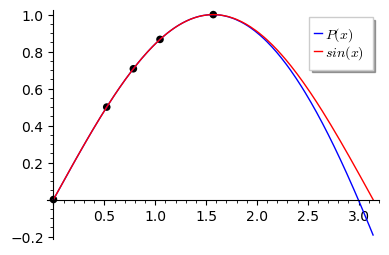

In [4]:
nodes=[(0, 0), (pi/6, 1/2), (pi/4, sqrt(2)/2), (pi/3, sqrt(3)/2), (pi/2, 1)]
R=PolynomialRing(RR, "x")
P=R.lagrange_polynomial(nodes); show(P)
A=plot(P, 0, pi, color="blue", legend_label="$P(x)$")
B=list_plot({0: 0, pi/6: 1/2, pi/4: sqrt(2)/2, pi/3: sqrt(3)/2, pi/2 : 1}, size=30, figsize=4, color="black")
C=plot(sin(x), 0, pi, color="red", legend_label="$sin(x)$")
show(A+B+C, figsize=4)

We see from the given plots that for the given values and from $0$ to $\pi/2$, the interpolation polynomial $P(x)\approx 
0.02879x^{4}−0.20434x^{3}+0.02137x^{2}+0.99562x$ is  accurate enough. 


#### <span style='color:#2196f3'>Exercise  \(Elementary Lagrange polynomials\)</span>

Consider the nodes $x_0=0$, $x_1=1$, $x_2=4$ and the values $y_0=1$, $y_1=2$, $y_2=4$.
Write down the corresponding Lagrange interpolation polynomial $P(x)$, 
and provide its plot, together with the plots of  the elementary Lagrange polynomials $\ell_0, \ell_1, \ell_2$, along with the given points.

#### Solution:

Three points $x_0, x_1, x_2$ are given, hence the Lagrange interpolation polynomial $P(x)$ is at most of degree two.
The elementary Lagrange polynomials are given by
$$
a(x):=\ell_{0}(x)=(x-x_{1})(x-x_{2})/(x_{0}-x_{1})(x_{0}-x_{2}),
$$

$$
b(x):=\ell_{1}(x)=(x-x_{0})(x-x_{2})/(x_{1}-x_{0})(x_{1}-x_{2}),
$$

$$
c(x):=\ell_{2}(x)=(x-x_{0})(x-x_{1})/(x_{2}-x_{0})(x_{2}-x_{1}).
$$

Thus we compute $a(x)=\frac{(x-1)(x-4)}{4}$, $b(x)=-\frac{x(x-4)}{3}$ and $c(x)=\frac{x(x-1)}{12}$ and now we can write down the interpolation polynomial $P(x)$, as follows:
$$
P(x)=y_0\ell_{0}(x)+y_1\ell_{1}(x)+y_2\ell_{2}(x)=-\frac{1}{12}x^2+\frac{13}{12}x+1\,.
$$
To verify this in Sage and plot the same time the given data, we have used the cell:



-1/12*x^2 + 13/12*x + 1

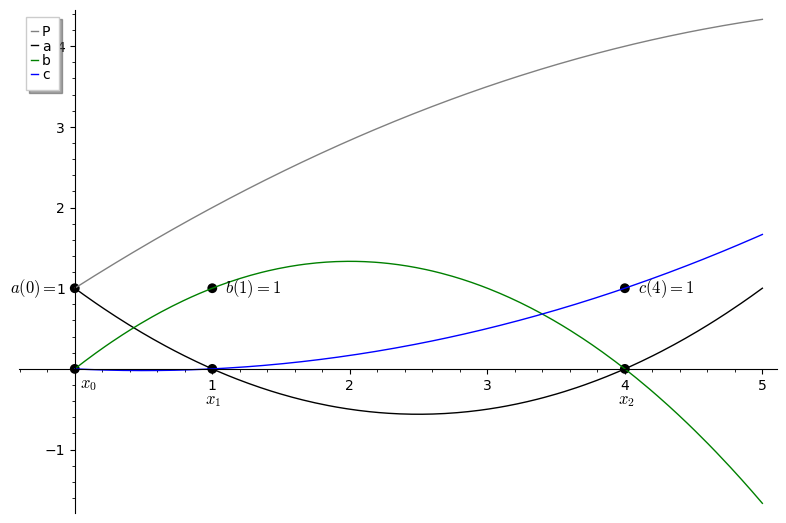

In [5]:
nodes=[(0, 1), (1, 2), (4, 4)]
R=PolynomialRing(QQ, "x")
P=R.lagrange_polynomial(nodes); show(P)
aa(x)=(x-1)*(x-4)/4
bb(x)=-x*(x-4)/3
cc(x)=x*(x-1)/12
a=plot(P(x), x, 0, 5, color="grey", legend_label="P")
b=plot(aa, x, 0, 5,  color="black", legend_label="a")
c=plot(bb, x, 0, 5,  color="green", legend_label="b")
d=plot(cc, x, 0, 5,  color="blue", legend_label="c")
p=point((0, 0), size=50, color="black")
pt=text("$x_0$",(0.1, -0.2),color="black", fontsize="12")
q=point((1, 0), size=50, color="black")
qt=text("$x_1$",(1.01, -0.4),color="black", fontsize="12")
r=point((4, 0), size=50, color="black")
rt=text("$x_2$",(4.01, -0.4),color="black", fontsize="12")
u=point((0, 1), size=50, color="black")
ut=text("$a(0)=$",(-0.3, 1.0),color="black", fontsize="12")
v=point((1, 1), size=50, color="black")
vt=text("$b(1)=1$",(1.3, 1.0),color="black", fontsize="12")
w=point((4, 1), size=50, color="black")
wt=text("$c(4)=1$",(4.3, 1.0),color="black", fontsize="12")
show(a+b+c+d+p+pt+q+qt+r+rt+u+ut+v+vt+w+wt, figsize=8)

#### <span style='color:#2196f3'>Exercise</span>

Prove that   the Lagrange interpolation polynomial for the  data given below, is of degree two:

\begin{matrix}
x_i & -2 & -1 & 1 & 2 \\
\hline
y_i & 1 & -1 & -1 & 1 
\end{matrix}

#### Solution:   

There are given 4 points $x_0, x_1, x_2, x_3$, so the Lagrange interpolation polynomial should be of degree $\leq 3$. We will use Sage to show that in fact it has degree $2$:



In [6]:
R = PolynomialRing(QQ, "x")
R.lagrange_polynomial([(-2 ,1) ,(-1 ,-1) ,(1 , -1), (2, 1)])

2/3*x^2 - 5/3

Thus the interpolation polynomial under question is given by $P(x)=\frac{2}{3}x^2-\frac{5}{3}$.

#### <span style='color:#2196f3'>**Exercise**</span>

Consider the function $f(x)=e^{2x}-2x$ and the points $x_0=1$, $x_1=1.5$, $x_2=1.6$. Construct the Lagrange interpolation polynomial $P(x)$, to approximate $f(1.55)$. Next find the difference between the approximation and the real value.

#### Solution:

We use SageMath and the command ${\tt{.lagrange\_polynomial}}$ to obtain the Lagrange interpolation polynomial. We have



In [7]:
nodes=[(1, e^2-2), (1.5, e^(3)-3), (1.6, e^(3.2)-3.2)]
R=PolynomialRing(RR, "x")
P=R.lagrange_polynomial(nodes); show(P)

31.7949518178380*x^2 - 56.0944178960809*x + 29.6885221771736

Thus $P(x)\approx 31.79495x^2-56.09441x+29.68852$ and $P(x)$ is of degree two.  Let us now compare the approximation with the real value:



In [8]:
P(1.55)

19.1295461806039

In [9]:
f(x)=e^(2*x)-2*x
f(1.55)

19.0979512814416

The difference between the approximation and the real value is given by the absolute value $\left|f(1.55)-P(1.55)\right|$. We compute

In [10]:
abs(f(1.55)-P(1.55))

0.0315948991622825

####  <span style='color:#2196f3'>** Remark (on the use of scipy)**</span>


We can apply the Lagrange intepolation method in SageMath also by using ${\tt{scipy}}$ and importing the ${\tt{scipy.intrpolate}}$ as follows:


In [11]:
#interpolation using scipy
import scipy
import scipy.interpolate
from scipy.interpolate import lagrange
import numpy as np
xx=np.array([0, 2, 3, 4])
yy=np.array([1, 3, 2, 1/2])
polL=lagrange(xx, yy)
polL

poly1d([ 0.10416667, -1.1875    ,  2.95833333,  1.        ])

Above we are looking for the Lagrange interpolation polynomials for the data $(0, 1)$, $(2, 3)$, $(3, 2)$, and $(4, 1/2)$, which we introduced in Sage in terms of $x$\- and $y$\-coordinates.  The answer returned by Sage should be read as  $P(x)\approx -0.1041x^3-1.1875x^2+2.9583x+1$. Finally,  note that we may also type


In [12]:
show(polL)


poly1d([ 0.10416667, -1.1875    ,  2.95833333,  1.        ])

#### <span style='color:#2196f3'>**Exercise for practice**</span>


Find via the method of ${\tt{scipy}}$ the Lagrange interpolation polynomial for the data $(0, e)$, $(0.25, \sqrt{\ln(e)})$, $(0.5, e^2)$, $(1, \sqrt{\ln(e^2)})$.

#### <span style='color:#607d8b'>**2\) Hermite interpolation**</span>

Rougly speaking Hermite interpolation polynomials are polynomials $P(x)$  that interpolate data that may includes their first derivatives. More particular assume
that are given:

  1. $n+1$  pairwise distinctint  nodes, say $x_0, \ldots, x_n$, 
  2. The values $y_0=P(x_0), \ldots, y_n=P(x_n)$,
  3. The first derivatives $y' _ 0, \ldots, y'_ n$, where  $y'_ i:=P'(x_i)$ and in general by $P'(x)$   we denote  the (first) derivative  of a function $P(x)$.
  

  Then we may express $P$ by the sum

  $$P(x)=\sum_{i=0}^ny_0\cdot h^{(1)}_ {i}(x)+\sum_{i=0}^ny'_ {i}\cdot h^{(2)}_ {i}(x)$$

  where $h^{(1)}_ i(x)$ and $h^{(2)}_ i(x)$ $(i=0, 1, \ldots, n)$ are the fundamental Hermite interpolation polynomials of first and second type,
  given by

  $$h^{(1)}_ {i}(x):=\Big(1-\frac{\ell''(x_i)}{\ell'(x_i)}(x-x_i)\Big)(\ell_{i}(x))^2, \quad\quad h^{(2)}_ {i}(x):=(x-x_i)(\ell_{i}(x))^2,$$

  respectively.
  Here  we have $\ell(x):=(x-x_0)(x-x_1)\cdots(x-x_n)$ and $\ell_i(x)$ are  the fundamental Lagrange polynomials introduced above (for $i=0, 1, \ldots, n$).

  Again, as in the case of Lagrange interpolation we can use the above method to interpolate some given function $f(x)$ at some given points.

---



#### <span style='color:#2196f3'>**Exercise**</span>

Consider the function $f(x)=\sin(x)$.
Given 5 distinct  points $x_0, x_1, x_2, x_3, x_4$ in the real line, write a code in Sage  which will return the Hermite interpolation polynomial $P(x)$ corresponding to these nodes and the values
$y_i=f(x_i)$ and $y'_i=f'(x_i)$, for $i=0, 1, 2, 3, 4$ \(for simplicity you may fix some 5\-tuple $(x_0, x_1, x_2, x_3, x_4)$\).

 #### Solution:



Since the Hermite interpolation method includes derivatives, next  we are goint to use commands
as ${\tt{derivative(f, x)}}$, which  gives the derivative of a function $f$ and ${\tt{derivative(f, x, n) }}$, returning the $n$th derivative of $f$ (see also below for more details on how one can treat derivatives in SageMath).
So, let us fix the nodes 

$$x_0=-2\pi, \quad x_1=-\pi/2, \quad x_2=0, \quad x_3=\pi/2, \quad x_4=2\pi.$$

Below we write the code in such a  way that changing only the very
first line, i.e., giving different values to the 5-tuple $(x_0, x_1, x_2, x_3, x_4)$, will immediately  produce the corresponding Hermite interpolation polynomial $P$, together with
the plots of the function $f(x)$ and that of $P(x)$.

1/16*(2*pi + x)^2*(2*pi - x)^2*(pi + 2*x)^2*(pi - 2*x)^2*x/pi^8 - 1/14400*(2*pi + x)^2*(2*pi - x)*(pi + 2*x)^2*(pi - 2*x)^2*x^2/pi^8 + 1/14400*(2*pi + x)*(2*pi - x)^2*(pi + 2*x)^2*(pi - 2*x)^2*x^2/pi^8 - 16/3375*(2*pi + x)^2*(2*pi - x)^2*(pi - 2*x)^2*x^2*(41*(pi + 2*x)/pi + 15)/pi^8 + 16/3375*(2*pi + x)^2*(2*pi - x)^2*(pi + 2*x)^2*x^2*(41*(pi - 2*x)/pi + 15)/pi^8

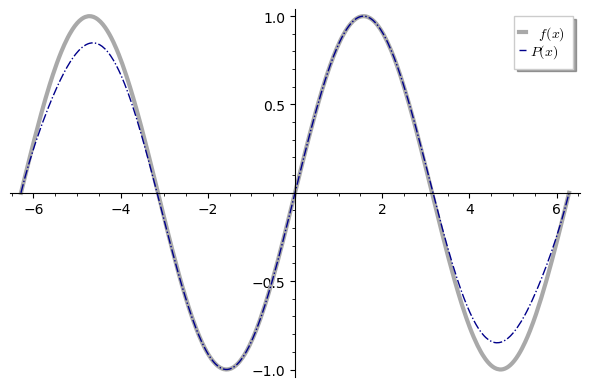

In [13]:
x0=-2*pi; x1=-pi/2; x2=0; x3=pi/2; x4=2*pi
l(x)=(x-x0)*(x-x1)*(x-x2)*(x-x3)*(x-x4)
d1l(x)=derivative(l, x)
d2l(x)=derivative(l(x),x,2)
l0(x)=((x-x1)*(x-x2)*(x-x3)*(x-x4))/((x0-x1)*(x0-x2)*(x0-x3)*(x0-x4))
l1(x)=((x-x0)*(x-x2)*(x-x3)*(x-x4))/((x1-x0)*(x1-x2)*(x1-x3)*(x1-x4))
l2(x)=((x-x0)*(x-x1)*(x-x3)*(x-x4))/((x2-x0)*(x2-x1)*(x2-x3)*(x2-x4))
l3(x)=((x-x0)*(x-x1)*(x-x2)*(x-x4))/((x3-x0)*(x3-x1)*(x3-x2)*(x3-x4))
l4(x)=((x-x0)*(x-x1)*(x-x2)*(x-x3))/((x4-x0)*(x4-x1)*(x4-x2)*(x4-x3))
h01(x)=(1-(d2l(x0)/d1l(x0))*(x-x0))*(l0(x))^2
h11(x)=(1-(d2l(x1)/d1l(x1))*(x-x1))*(l1(x))^2
h21(x)=(1-(d2l(x2)/d1l(x2))*(x-x2))*(l2(x))^2
h31(x)=(1-(d2l(x3)/d1l(x3))*(x-x3))*(l3(x))^2
h41(x)=(1-(d2l(x4)/d1l(x4))*(x-x4))*(l4(x))^2
h02(x)=(x-x0)*(l0(x))^2
h12(x)=(x-x1)*(l1(x))^2
h22(x)=(x-x2)*(l2(x))^2
h32(x)=(x-x3)*(l3(x))^2
h42(x)=(x-x4)*(l4(x))^2
f(x)=sin(x)
y0=f(x0); y1=f(x1); y2=f(x2); y3=f(x3); y4=f(x4)
dy0=derivative(f(x), x)(x=x0)
dy1=derivative(f(x), x)(x=x1)
dy2=derivative(f(x), x)(x=x2)
dy3=derivative(f(x), x)(x=x3)
dy4=derivative(f(x), x)(x=x4)
P(x)=y0*h01(x)+y1*h11(x)+y2*h21(x)+y3*h31(x)+y4*h41(x)+dy0*h02(x)+dy1*h12(x)+dy2*h22(x)+dy3*h32(x)+dy4*h42(x)
show(P(x))
a=plot(f(x), x, x0, x4, color="darkgray", thickness=3, legend_label="  $f(x)$")
b=plot(P(x), x, x0, x4, color="darkblue", thickness=1, linestyle="-.", legend_label="$P(x)$")
show(a+b)


In fact one case see the explicit form of  Hermite interpolation polynomials of 1st and 2nd type, after typing (for instance, for the 1st type)

In [14]:
show([h01(x), h11(x), h21(x), h31(x)])

[1/432000*(2*pi - x)^2*(pi + 2*x)^2*(pi - 2*x)^2*x^2*(109*(2*pi + x)/pi + 30)/pi^8,
 16/3375*(2*pi + x)^2*(2*pi - x)^2*(pi - 2*x)^2*x^2*(41*(pi + 2*x)/pi + 15)/pi^8,
 1/16*(2*pi + x)^2*(2*pi - x)^2*(pi + 2*x)^2*(pi - 2*x)^2/pi^8,
 16/3375*(2*pi + x)^2*(2*pi - x)^2*(pi + 2*x)^2*x^2*(41*(pi - 2*x)/pi + 15)/pi^8]

Let us focus on these polynomials for a few, for instance on $h_{0}^{(1)}(x)$. Let us find its coefficients:

In [15]:
R.<x> = PolynomialRing(QQ)
h01(x).coefficients()

[[31/13500/pi^2, 2],
 [-139/108000/pi^3, 3],
 [-677/36000/pi^4, 4],
 [1519/144000/pi^5, 5],
 [181/4500/pi^6, 6],
 [-407/18000/pi^7, 7],
 [-47/6750/pi^8, 8],
 [109/27000/pi^9, 9]]

This means that $h_0^{(1)}(x)$ is of degree $9$ and has no term of first order and no constant coefficient, as we can see also based on the command ${\tt{expand}}$:

In [16]:
expand(h01(x))

31/13500*x^2/pi^2 - 139/108000*x^3/pi^3 - 677/36000*x^4/pi^4 + 1519/144000*x^5/pi^5 + 181/4500*x^6/pi^6 - 407/18000*x^7/pi^7 - 47/6750*x^8/pi^8 + 109/27000*x^9/pi^9

Let us now check $h_0^{(2)}(x)$

In [17]:
h02(x).coefficients()

[[1/1800/pi, 2],
 [-1/3600/pi^2, 3],
 [-11/2400/pi^3, 4],
 [11/4800/pi^4, 5],
 [1/100/pi^5, 6],
 [-1/200/pi^6, 7],
 [-1/450/pi^7, 8],
 [1/900/pi^8, 9]]

In [18]:
expand(h02(x))

1/1800*x^2/pi - 1/3600*x^3/pi^2 - 11/2400*x^4/pi^3 + 11/4800*x^5/pi^4 + 1/100*x^6/pi^5 - 1/200*x^7/pi^6 - 1/450*x^8/pi^7 + 1/900*x^9/pi^8

Lets us now  plot  the Hermite polynomials of first and of second type seperately:

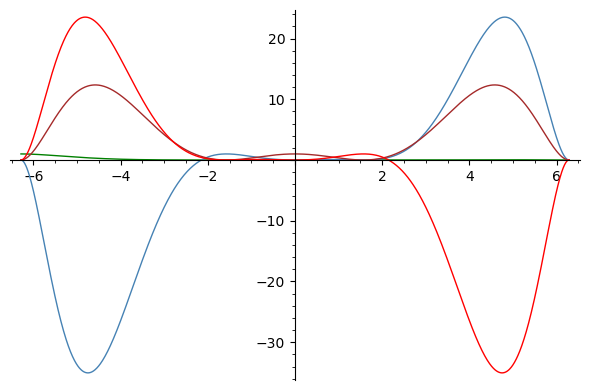

In [19]:
p1=plot(h01(x), x, x0, x4, color="green")
p2=plot(h11(x), x, x0, x4, color="steelblue")
p3=plot(h21(x), x, x0, x4, color="brown")
p4=plot(h31(x), x, x0, x4, color="red")
show(p1+p2+p3+p4)

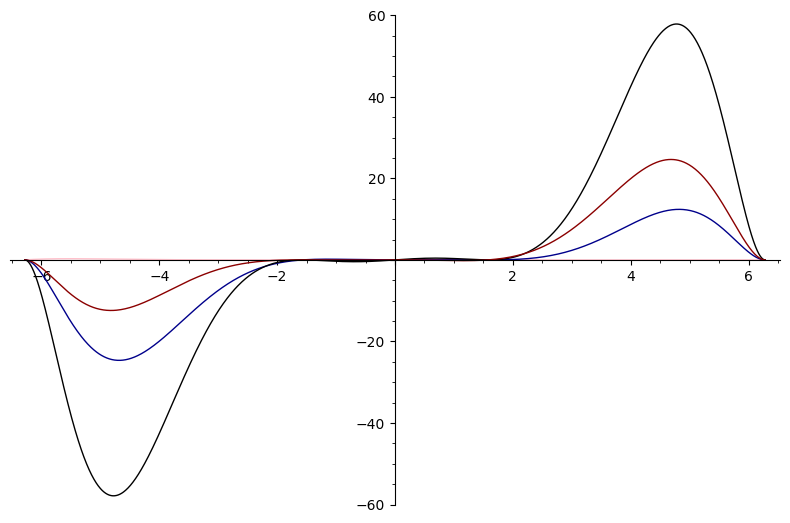

In [20]:
t1=plot(h02(x), x, x0, x4, color="pink", figsize=8)
t2=plot(h12(x), x, x0, x4, color="darkblue")
t3=plot(h22(x), x, x0, x4, color="black")
t4=plot(h32(x), x, x0, x4, color="darkred")
show(t1+t2+t3+t4)

We proceed with   another example:

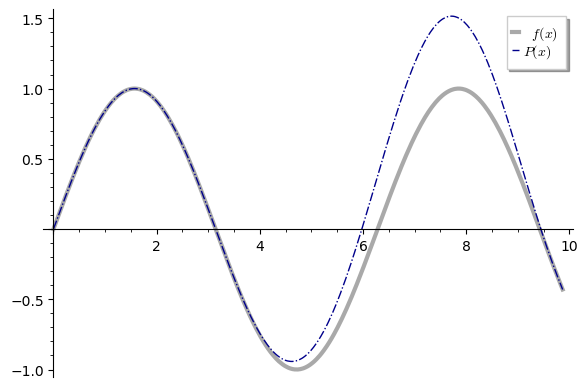

In [21]:
x0=0; x1=0.2; x2=1/e; x3=e; x4=pi**2
l(x)=(x-x0)*(x-x1)*(x-x2)*(x-x3)*(x-x4)
d1l(x)=derivative(l, x)
d2l(x)=derivative(l(x),x,2)
l0(x)=((x-x1)*(x-x2)*(x-x3)*(x-x4))/((x0-x1)*(x0-x2)*(x0-x3)*(x0-x4))
l1(x)=((x-x0)*(x-x2)*(x-x3)*(x-x4))/((x1-x0)*(x1-x2)*(x1-x3)*(x1-x4))
l2(x)=((x-x0)*(x-x1)*(x-x3)*(x-x4))/((x2-x0)*(x2-x1)*(x2-x3)*(x2-x4))
l3(x)=((x-x0)*(x-x1)*(x-x2)*(x-x4))/((x3-x0)*(x3-x1)*(x3-x2)*(x3-x4))
l4(x)=((x-x0)*(x-x1)*(x-x2)*(x-x3))/((x4-x0)*(x4-x1)*(x4-x2)*(x4-x3))
h01(x)=(1-(d2l(x0)/d1l(x0))*(x-x0))*(l0(x))^2
h11(x)=(1-(d2l(x1)/d1l(x1))*(x-x1))*(l1(x))^2
h21(x)=(1-(d2l(x2)/d1l(x2))*(x-x2))*(l2(x))^2
h31(x)=(1-(d2l(x3)/d1l(x3))*(x-x3))*(l3(x))^2
h41(x)=(1-(d2l(x4)/d1l(x4))*(x-x4))*(l4(x))^2
h02(x)=(x-x0)*(l0(x))^2
h12(x)=(x-x1)*(l1(x))^2
h22(x)=(x-x2)*(l2(x))^2
h32(x)=(x-x3)*(l3(x))^2
h42(x)=(x-x4)*(l4(x))^2
f(x)=sin(x)
y0=f(x0); y1=f(x1); y2=f(x2); y3=f(x3); y4=f(x4)
dy0=derivative(f(x), x)(x=x0)
dy1=derivative(f(x), x)(x=x1)
dy2=derivative(f(x), x)(x=x2)
dy3=derivative(f(x), x)(x=x3)
dy4=derivative(f(x), x)(x=x4)
P(x)=y0*h01(x)+y1*h11(x)+y2*h21(x)+y3*h31(x)+y4*h41(x)+dy0*h02(x)+dy1*h12(x)+dy2*h22(x)+dy3*h32(x)+dy4*h42(x)
a=plot(f(x), x, x0, x4, color="darkgray", thickness=3, legend_label="  $f(x)$")
b=plot(P(x), x, x0, x4, color="darkblue", thickness=1, linestyle="-.", legend_label="$P(x)$")
show(a+b)

As we can see $P(x)$ has much more complicated form than the previous case:


In [22]:
P(x).simplify()

25.0*(pi^2 - x)^2*(x - e)^2*(x - e^(-1))^2*(x - 0.2)^2*x/pi^4 + (pi^2 - x)^2*(x - e)^2*(x - e^(-1))*(x - 0.2)^2*x^2*cos(e^(-1))*e^2/((pi^2 - e^(-1))^2*(e - e^(-1))^2*(e^(-1) - 0.2)^2) + (pi^2 - x)^2*(x - e)*(x - e^(-1))^2*(x - 0.2)^2*x^2*cos(e)*e^(-2)/((pi^2 - e)^2*(e - e^(-1))^2*(e - 0.2)^2) - (pi^2 - x)^2*(x - e^(-1))^2*(x - 0.2)^2*x^2*(2*((pi^2 - e)*(e - e^(-1))*(e - 0.2) + (pi^2 - e)*(e - e^(-1))*e + (pi^2 - e)*(e - 0.2)*e - (e - e^(-1))*(e - 0.2)*e)*(x - e)*e^(-1)/((pi^2 - e)*(e - e^(-1))*(e - 0.2)) - 1)*e^(-2)*sin(e)/((pi^2 - e)^2*(e - e^(-1))^2*(e - 0.2)^2) - (pi^2 - x)^2*(x - e)^2*(x - 0.2)^2*x^2*(2*((pi^2 - e^(-1))*(e - e^(-1))*(e^(-1) - 0.2) + (pi^2 - e^(-1))*(e - e^(-1))*e^(-1) - (pi^2 - e^(-1))*(e^(-1) - 0.2)*e^(-1) - (e - e^(-1))*(e^(-1) - 0.2)*e^(-1))*(x - e^(-1))*e/((pi^2 - e^(-1))*(e - e^(-1))*(e^(-1) - 0.2)) - 1)*e^2*sin(e^(-1))/((pi^2 - e^(-1))^2*(e - e^(-1))^2*(e^(-1) - 0.2)^2) + 0.9800665778412416*(pi^2 - x)^2*(x - e)^2*(x - e^(-1))^2*(x - 0.2)*x^2/((pi^2 - 0.2)^2*(

In [23]:
show(_)

25.0*(pi^2 - x)^2*(x - e)^2*(x - e^(-1))^2*(x - 0.2)^2*x/pi^4 + (pi^2 - x)^2*(x - e)^2*(x - e^(-1))*(x - 0.2)^2*x^2*cos(e^(-1))*e^2/((pi^2 - e^(-1))^2*(e - e^(-1))^2*(e^(-1) - 0.2)^2) + (pi^2 - x)^2*(x - e)*(x - e^(-1))^2*(x - 0.2)^2*x^2*cos(e)*e^(-2)/((pi^2 - e)^2*(e - e^(-1))^2*(e - 0.2)^2) - (pi^2 - x)^2*(x - e^(-1))^2*(x - 0.2)^2*x^2*(2*((pi^2 - e)*(e - e^(-1))*(e - 0.2) + (pi^2 - e)*(e - e^(-1))*e + (pi^2 - e)*(e - 0.2)*e - (e - e^(-1))*(e - 0.2)*e)*(x - e)*e^(-1)/((pi^2 - e)*(e - e^(-1))*(e - 0.2)) - 1)*e^(-2)*sin(e)/((pi^2 - e)^2*(e - e^(-1))^2*(e - 0.2)^2) - (pi^2 - x)^2*(x - e)^2*(x - 0.2)^2*x^2*(2*((pi^2 - e^(-1))*(e - e^(-1))*(e^(-1) - 0.2) + (pi^2 - e^(-1))*(e - e^(-1))*e^(-1) - (pi^2 - e^(-1))*(e^(-1) - 0.2)*e^(-1) - (e - e^(-1))*(e^(-1) - 0.2)*e^(-1))*(x - e^(-1))*e/((pi^2 - e^(-1))*(e - e^(-1))*(e^(-1) - 0.2)) - 1)*e^2*sin(e^(-1))/((pi^2 - e^(-1))^2*(e - e^(-1))^2*(e^(-1) - 0.2)^2) + 0.9800665778412416*(pi^2 - x)^2*(x - e)^2*(x - e^(-1))^2*(x - 0.2)*x^2/((pi^2 - 0.2)^2*(e - 0.2)^2*(-0.2*e^(-1) + 0.04000000000000001)^2) + (pi^2 - x)^2*(x - e)^2*(x - e^(-1))^2*x^2*(-0.1986693307950612*(5.0*(pi^2 - 0.2)*(e - 0.2)*(2*e^(-1) - 0.4) - 5.0*(pi^2 - 0.2)*(0.4*e - 0.08000000000000002) - 5.0*(pi^2 - 0.2)*(0.4*e^(-1) - 0.08000000000000002) - 5.0*(e - 0.2)*(0.4*e^(-1) - 0.08000000000000002))*(x - 0.2)/((pi^2 - 0.2)*(e - 0.2)*(e^(-1) - 0.2)) + 0.1986693307950612)/((pi^2 - 0.2)^2*(e - 0.2)^2*(-0.2*e^(-1) + 0.04000000000000001)^2) - (pi^2 - x)*(x - e)^2*(x - e^(-1))^2*(x - 0.2)^2*x^2*cos(pi^2)/(pi^4*(pi^2 - e)^2*(pi^2 - e^(-1))^2*(pi^2 - 0.2)^2) + (x - e)^2*(x - e^(-1))^2*(x - 0.2)^2*x^2*(2*(pi^2*(pi^2 - e)*(pi^2 - e^(-1)) + pi^2*(pi^2 - e)*(pi^2 - 0.2) + pi^2*(pi^2 - e^(-1))*(pi^2 - 0.2) + (pi^2 - e)*(pi^2 - e^(-1))*(pi^2 - 0.2))*(pi^2 - x)/(pi^2*(pi^2 - e)*(pi^2 - e^(-1))*(pi^2 - 0.2)) + 1)*sin(pi^2)/(pi^4*(pi^2 - e)^2*(pi^2 - e^(-1))^2*(pi^2 - 0.2)^2)

#### <span style='color:#607d8b'>**3\) Splines**</span>

Let us finally present a series of problems related to splines and in particular \(naturall\) cubic splines.  

Our guide here is Section 5.1.9 by Brisk Guide to Mathematics.

---



#### <span style='color:#2196f3'>**Exercise**</span>

Find and plot the spline for the points
$(k+\sin(k^2)/2, k-\cos(k^2))$ for $k=0, 1,\ldots, 9$.

#### Solution:

We present the solutin directly via Sage Math



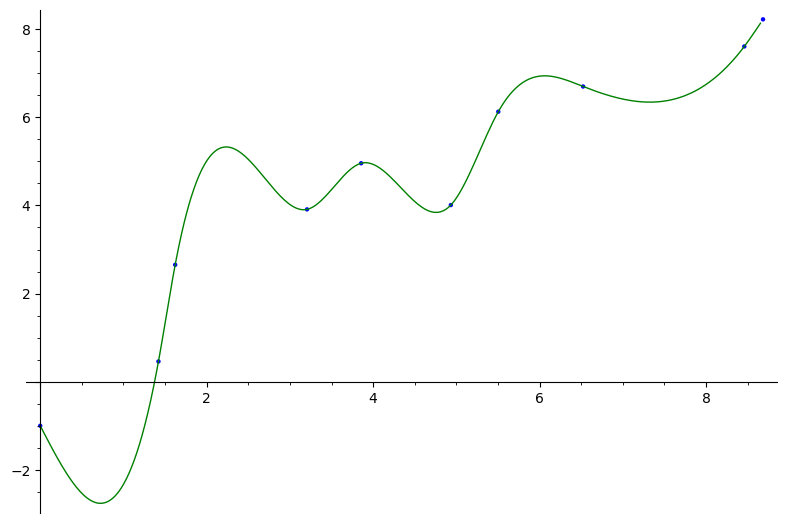

[(0, -1), (1/2*sin(1) + 1, -cos(1) + 1), (1/2*sin(4) + 2, -cos(4) + 2), (1/2*sin(9) + 3, -cos(9) + 3), (1/2*sin(16) + 4, -cos(16) + 4), (1/2*sin(25) + 5, -cos(25) + 5), (1/2*sin(36) + 6, -cos(36) + 6), (1/2*sin(49) + 7, -cos(49) + 7), (1/2*sin(64) + 8, -cos(64) + 8), (1/2*sin(81) + 9, -cos(81) + 9)]

In [24]:
pts =[(k+sin(k^2)/2, k-cos(k^2)) for k in range(10)]
f=spline(pts)
a=plot(f, 0, 9, color="green", figsize=8)
show(points(pts)+a)
show(f)

#### <span style='color:#2196f3'>**Exercise**</span>

Plot the spline corresponding to the data $(0, 1)$, $(1, 2)$, $(2, 2.5)$, $(3, 1.5)$, $(4, 0.5 )$, $(5, 0.9)$ and $(6, -0.5)$.
Next compute its value at

the points $0.3$, $2.4$, $5.6$. Can we compute also its value at the point $6.1$?  Then compute the area underneath the spline.

#### Solution:



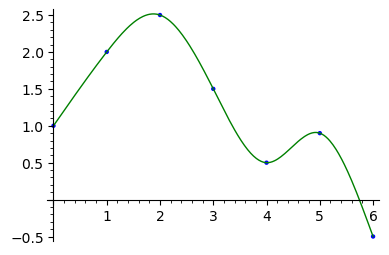

In [25]:
pts = [(0,1),(1,2),(2,2.5),(3,1.5),(4,0.5),(5,0.9),(6,-0.5)]
func=spline(pts)
a=plot(func, 0, 6, color="green", figsize=4)
show(points(pts)+a)

In [26]:
func(0.3)

1.309765

In [27]:
func(2.4)

2.2493353846153847

In [28]:
func(5.6)

0.2534584615384622

In [29]:
func(6.1)

nan

Hence we cannot compute the value of the spline at points that are not included in between the given points.

Now, to compute the area underneath the spline we should apply an integration (look in Section 3.9 for more details and further applications of integration).

In [30]:
func.definite_integral(0, 6)

7.900961538461538

Here is another example:


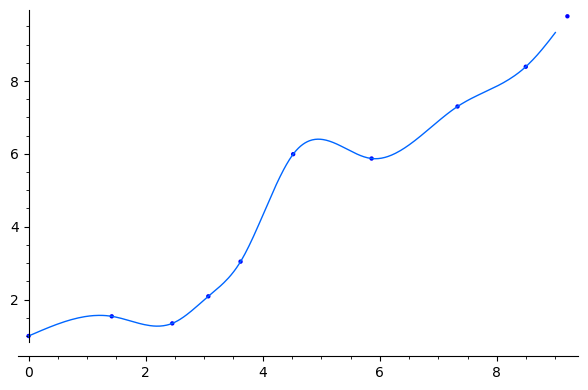

In [31]:
v = [(i + RDF(i).sin()/2, i + RDF(i^2).cos()) for i in range(10)]
s = spline(v)
show(point(v) + plot(s,0,9, hue=.6))

## 4.3.   <span style='color:#009688'>Limits of sequences and functions</span>

Next we are interested in studying  the convergence of given sequences or  computing limits of functions. 
We begin with sequences. 

 Recall that  a sequence is an enumerated collection of objects in which repetitions are allowed and order matters.
Sequences can be viewed as functions $ \mathbb{N}\to A\subseteq\mathbb{R}$, where as usual $\mathbb{N}=\{1, 2, 3, \ldots\}\subset\mathbb{R}$ denotes the set of natural numbers (we often include $0$ as a natural), and $A$ is a subset of real numbers.
We often denote a sequence by $(a_{n})_ {n\in\mathbb{N}}$, where  $a_{n}$  is its $n$th-term. In the previous Chapter we  met sequences defining  by recursion, as the Fibonacci sequence,
$$
F_{n}=F_{n-1}+F_{n-2}\,.
$$

However below we will treat more general sequences.  An important property of a sequence is convergence, and this is what we are interested in below. If a sequence converges, it converges to a particular value known as the limit. If a sequence $(a_{n})_ {n\in\mathbb{N}}$, converges to some limit, then it is called convergent, and moreover this limit is unique, denoted by $\lim_{n\to\infty}a_{n}$.  A sequence that does not converge is called  divergent.  An example of a divergent sequence is given by $b_n=(-1)^n$.

---



####

#### <span style='color:#2196f3'>Example \(Limits of sequences\)</span>

Try to verify ${\textit{graphically}}$ via SageMath that the sequence $a_{n}=\frac{(-1)^n}{n}$ converges to zero \(for example, plot the first 100 terms of the sequece at hand\).

#### Solution:

We have already seen in Chapter 1 how to plot sequences, via a method  combining  the  ${\tt{Graphics object}}$ with the ${\tt{for}}$ command.
For our case one can give the cell



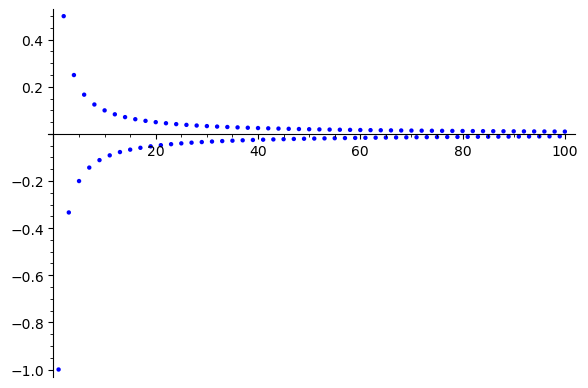

In [32]:
A=Graphics()
for i in srange (1, 100+1):
    A=A+points((i, (-1)^i/i))
A

Hence $(a_n)$ should converge to $0$. To comfirm this fact via Sage use the command ${\tt{limit}}$ as follows (see also below)

In [35]:
var("n"); limit((-1)^n/n, n=oo) # oo is an alias of Infinity or infinity in Sage

0

#### <span style='color:#2196f3'>Exercise </span>

Prove that the seqence  $u(n):=\displaystyle\frac{2n^2+4n+1}{2n+1}$ tends to $+\infty$ as $n\to\infty$.

#### Solution:

We need to show that 

$$\lim_{n\to\infty}u(n)=+\infty.$$


We may multiple both the numerators and denominator of $u(n)$ by $1/n$. This gives the claim
\begin{eqnarray*}
\lim_{n\to\infty}\frac{2n^2+4n+1}{2n+1}&=&\lim_{n\to\infty}\frac{\frac{1}{n}(2n^2+4n+1)}{\frac{1}{n}(2n+1)}\\\\
&=&\lim_{n\to\infty}\frac{2n+4+\frac{1}{n}}{2+\frac{1}{n}}\\\\
&=&\frac{\infty+4+0}{2+0}=+\infty\,,
\end{eqnarray*}
since $\frac{1}{n}\to 0$ as $n\to\infty$. To verify this via Sage we may use the command  ${\tt{limit}}$ or its   alias  ${\tt{lim}}$, as follows \(see also below\)


In [36]:
n=var("n")
u(n)=(2*n^2+4*n+1)/(2*n+1)
lim(u(n), n=infinity)

+Infinity

#### <span style='color:#2196f3'>Exercise </span> 

Prove that $\lim_{n\to\infty}a(n)=0$, where $a(n):=\displaystyle\frac{4n+1}{2n^2+4n+1}$.  Next plots its first 100 terms.

#### Solution:

In [37]:
n=var("n")
a(n)=(4*n+1)/(2*n**2+4*n+1)
lim(a(n), n=infinity)

0

Let us now plot the first 100 temrs of $a(n)$ and illustrate the convergence to zero:  Notice, on could type

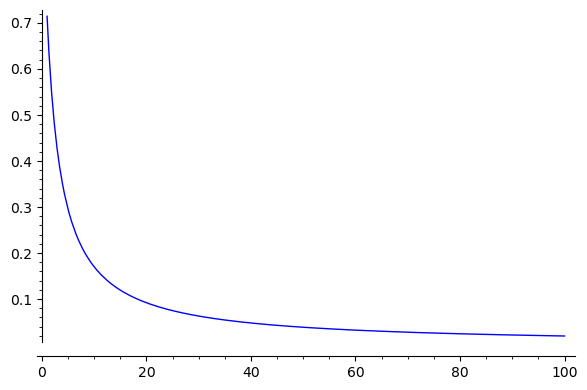

In [38]:
plot(a(n), n, 1, 100)

Recall however that a sequence is a function which has the natural numbers as domain, thus to get the correct graph of $a(n)$
you should use the method presented above.

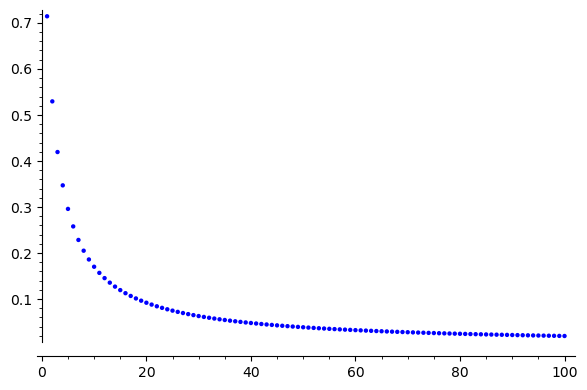

In [39]:
B=Graphics()
for n in srange (1, 100+1):
    B=B+points((n, (4*n+1)/(2*n**2+4*n+1)))
B

#### <span style='color:#2196f3'>Exercise </span>

Compute the following limits in SageMath:

  1.  $\lim_{n\to\infty}A(n)$, where $A(n):=\sqrt{(4n^2+n)}-2n$.
  2.  $\lim_{n\to\infty}B(n)$, where $B(n):=\displaystyle\frac{2^n+2^{-n}}{2^n-2^{-n}}$.
  3. $\lim_{n\to\infty}E(n)$, wherer $E(n):=(1+\frac{1}{n})^n$.
  

  #### Solution:

The solutions can be obtained sing the command ${\tt{limit}}$, or its alias ${\tt{lim}}$. 



In [40]:
n=var("n")
A(n)=sqrt((4*n**2+n))-2*n
lim(A(n), n=infinity)

1/4

In [41]:
n=var("n")
B(n)=(2**n+2**(-n))/(2**n-2**(-n))
lim(B(n), n=infinity)

1

In [42]:
n=var("n")
E(n)=(1+1/n)**n
lim(E(n), n=infinity)

e

Hence $\lim_{n\to\infty}E(n)=e$, where $e$ is the Euler number (the base of the natural logarithm) (a classical result in calculus).

#### <span style='color:#2196f3'>Limits of 1\-variable functions.</span>

The sequences are special examples of functions defined on the subset of  natural numbers $\mathbb{N}\subset\mathbb{R}$.  Next we treat limits of more general  real\-valued functions \(with one variable\).

In SageMath an appropriate command for computing limits of a given function $f(x)$  is again based on the command ${\tt{limit}}$ and has the form
$${\tt{limit(f(x), x=a, direction)}}$$
where $x=a\in\mathbb{R}$. The option \`\`direction''  is to study the limits to the left or to the right. This option can be omitted, but in case we need to use it can be introduced as  ${\tt{dir="left"}}$ or  ${\tt{dir="right"}}$, or ${\tt{dir="-"}}$ and ${\tt{dir="+"}}$, respectively.

#### <span style='color:#2196f3'>Remark.</span>

By default, Sage calculates  the limit to the left.



#### <span style='color:#2196f3'>**Example**</span>

Evaluate the limit $\lim_{x\to 0}\displaystyle\frac{4\sin(x)}{x}$.

#### Solution

It is well-know that $\lim_{x\to 0}\displaystyle\frac{\sin(x)}{x}=1$, so we expect that the given limit equals to 4. Indeed, in Sage we verify this as follows:



In [43]:
f(x)=4*sin(x)/x
limit(f, x=0)   

x |--> 4

Or just type


In [44]:
lim(4*sin(x)/x, x=0)  

4

Let us also verify the claim by computing the left and right limits.


In [45]:
lim(4*sin(x)/x, x=0, dir="minus")

4

In [46]:
lim(4*sin(x)/x, x=0, dir="left") # as an alternative of the dir=minus is dir=left

4

In [47]:
lim(4*sin(x)/x, x=0, dir="plus")

4

In [48]:
lim(4*sin(x)/x, x=0, dir="right") # as an alternative of the dir=plus is dir=right

4

Since the left and right limit of $f(x)=4\sin(x)/x$ are both equal to 4, the claim follows.


#### <span style='color:#607d8b'>**Some remarks on the computation of limits**</span>

If $f_1, g_1$ are functions on $\R$ with  $f_1(x)\ne 0$ and $g_1(x)\ne 0$, for all $x$, 
we can write
$$
\frac{f_1 (x) + f_2 (x) + \cdots + f_m (x)}{g_1 (x) + g_2 (x) + \cdots + g_n (x)}
 =  \frac{f_1 (x)\bigl(1 + \frac{f_2 (x)}{f_1(x)} + \cdots + \frac{f_m(x)}{f_1(x)}\bigr)}{g_1 (x)\bigl(1 + \frac{g_2 (x)}{g_1(x)} + \cdots +\frac{g_n(x)}{g_1(x)}\bigr)}
$$
Thus, if $\lim_{x\to x_0} \frac{f_i (x)}{f_1 (x)} = 0$, for all $i \in \{2, \dots, m\}$, and $\lim_{x\to x_0} \frac{g_i (x)}{g_1 (x)}=0$, for all $i \in \{2, \dots, n\}$, 
then
$$\lim_{x\to x_0} \frac{f_1 (x) + f_2 (x) + \cdots + f_m (x)}{g_1 (x) + g_2 (x) + \cdots + g_n (x)}=\lim_{x\to x_0} \frac{f_1 (x)}{g_1 (x)}, $$
supposing the limit on the right\-hand side exists.
This is an approach that we often apply to compute limits of functions given as fractions.

#### <span style='color:#607d8b'>**Squeeze Theorem**</span>

Another very useful result for the computation of limits is  the so called Squeeze Theorem, which states the following:

 Let $I\subset\mathbb{R}$  be an interval containing the point $x_0$. Let $g, f, h$ be functions defined on $I$, except possibly at $x_0$ itslef. 
 Suppose that for any $x\in I$ we have that
 $$
 g(x)\leq f(x)\leq h(x), \ \ \ \ \text{and} \ \ \ \ \lim_{x\to x_0}g(x)=L=\lim_{x\to x_0}h(x).
 $$
 Then $\lim_{x\to x_0}f(x)=L$.



#### <span style='color:#2196f3'>**Exercise**</span>

Compute the following limits (note that some of them may not exist - specify them)

   1.    $\lim\frac{\sqrt{x}-2}{\sqrt{x+8}-1}$ when  $x\to 0$, $x\to 3$, and $x\to 8$.
   2.    $\lim_{x\to 8}\frac{\sqrt[3]{x}-2}{\sqrt[3]{x+19}-3}$.
   3.    $\lim_{x\to 0}\frac{x}{|x|}$.
   4.    $\lim_{x\to 0^-}\frac{x}{|x|}$.
   5.    $\lim_{x\to 0^+}\frac{x}{|x|}$.
   6.    $\lim_{x\to 0}\frac{\sin x}{x}$ (and also the two-side limits, as above).
   7.    $\lim_{x\to 0}\frac{\tan x}{x}$ (and also the two-side limits).
   8.    $\lim_{x\to\infty}\frac{\sin x}{x}$.
   9.    $\lim_{x\to 0}\frac{\sin x}{|x|}$  (and also the two-side limits).
   10.  $\lim_{x\to 0}\sin(\frac{1}{x})$.
   11.  $\lim_{x\to 0}x\sin(\frac{1}x)$.
   12.  $\lim_{x\to+\infty}e^{-x}$.
   13.  $\lim_{x\to+\infty}\left(1+\frac{1}{x}\right)^{x}$.
   14.  $\lim_{x\to+\infty}\frac{\ln x}{x}$
   15. $\lim_{x\to\pm\infty}\frac{x}{\ln x}$.

#### Solution:

1) For the first case, one may apply the cell

In [49]:
b=lim((sqrt(x)-2)/(sqrt(x+8)-1), x=0)
b.full_simplify ()

-2/(2*sqrt(2) - 1)

In case you like a  decimal presentation,  proceed as usual, i.e.,


In [50]:
N(b)

-1.09383632135605

For the case $x\to 3$ similarly we compute

In [51]:
N(lim((sqrt(x)-2)/(sqrt(x+8)-1), x=3))

-0.115663612660389

and for $x\to 8$ via the same method we obtain



In [52]:
N(lim((sqrt(x)-2)/(sqrt(x+8)-1), x=8))

0.276142374915397

2. In the second case we get an indefinite of type $\frac{0}{0}$. Hence we can apply  l'Hopital's rule \(see below\)  to compute this limit by hand. By SageMath we get directly
   the result as follows:



In [53]:
lim((x**(1/3)-2)/((x+19)**(1/3)-3), x=8)

9/4

Let us present the rest limits in question.

3)

In [54]:
lim(x/abs(x), x=0)  # this limit doesn't exist

und

This  answer means that the limit is undetermined, i.e., it doesn't exist. It may be useful to  plot this function, to understand this result in a visual way.

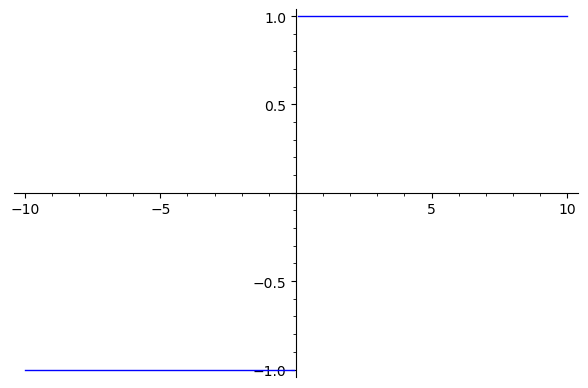

In [55]:
plot(x/abs(x), x, -10, 10, exclude=[0])

4.


In [56]:
lim(x/abs(x), x=0, dir="left")

-1

5.


In [57]:
lim(x/abs(x), x=0, dir="right")

1

Hence although the left and right limits exist, they are not equal and hece this gives another explanation

why the limit in case 3. does not exist.


6. This is a very classical limit that everyone should know to prove also in a formal way \(such one is based on the squeeze theorem\).



In [58]:
lim(sin(x)/x, x=0,  dir="right")

1

In [59]:
lim(sin(x)/x, x=0,  dir="left")

1

In [60]:
lim(sin(x)/x, x=0)

1

7,


In [61]:
lim(tan(x)/x, x=0)

1

In [62]:
lim(tan(x)/x, x=0,  dir="plus")

1

In [63]:
lim(tan(x)/x, x=0,  dir="minus")

1

8.


In [64]:
lim(sin(x)/x, x=oo)

0

We can illustrate this result by plotting the   function $f(x)=\frac{\sin x}{x}$, in the usual way 

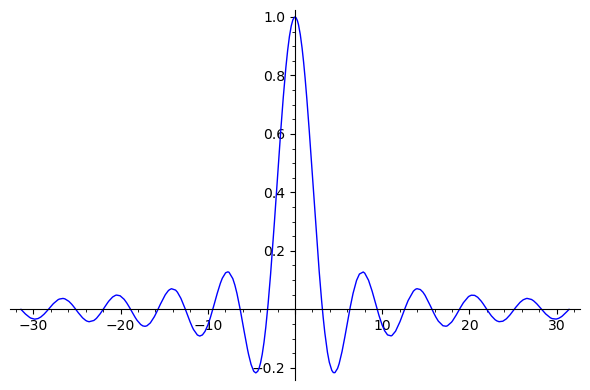

In [65]:
plot(sin(x)/x, x, -10*pi, 10*pi)

9.


In [66]:
lim(sin(x)/abs(x), x=0) # this limit doesnt exist

und

In [67]:
lim(sin(x)/abs(x), x=0,  dir="+")

1

In [68]:
lim(sin(x)/abs(x), x=0,  dir="-")

-1

In [69]:
limit((1+1/x)**x,x=infinity)  # An indeterminate form!

e

We leave the rest few cases for practice.

---



## 4.4.   <span style='color:#009688'>Continuous functions</span>

We now proceed with tasks on the continuity of functions. We recall first some basic definitions.

**Definition.**
Let $f: \mathbb{R} \to \mathbb{R}$ be a function, $x_0 \in \mathbb{R}$. $f$ _**is continuous at**_ $x_0$ if
$$ \lim_{x \to x_0} f(x) = f(x_0), $$
and $f$ _**is continuous on**_ $A \subset \mathbb{R}$ if for all $a \in A$, $f$ is continuous at $a$.

---



#### <span style='color:#2196f3'>**Example**</span>

Consider the function $f(x)$ defined as:
$$f(x) =
    \begin{cases}
        -x & \text{if } x < 0 \\
        x^2 & \text{if } x \ge 0.
    \end{cases}$$
Show that $f$ is continuous.





#### **Solution:**

If $a < 0$ then $\lim_{x \to a}f(x) = \lim_{x \to a}(-x) = -a,$ which coincides with $f(a)$. Same argument applies when $a > 0$.
It remains to show that $\lim_{x\to 0}f(x) = f(0)$.

In [70]:
(-x).limit(x=0, dir='-')

0

In [71]:
(x^2).limit(x=0, dir='+')

0

One\-sided limits at $0$ coincide: they are both equal to $0$.  Combining this with the relation $f(0)=0$,we deduce that $f$ is also continuous at $0$.



#### <span style='color:#2196f3'>**Exercise**</span>

Consider the function $f(x, a, b)$ defined as:
$$f(x, a, b) =
\begin{cases}
	ax + b & \text{if } x < 0 \\
	x^2 & \text{if }x \ge 0.
   \end{cases}$$
Specify the values of the parameters $a$ and $b$ such that $f(x, a, b)$ is continuous at $x = 0$.

#### Solution:


In [72]:
var('a')
var('b')
# we already know that the right limit of x^2 at x=0 is 0
(a*x+b).limit(x=0, dir='-') == 0

b == 0

#### <span style='color:#2196f3'>**Exercise for practice**</span>

Consider the piecewise function defined below directly in Sage. Examine its continuity at $x=0$.



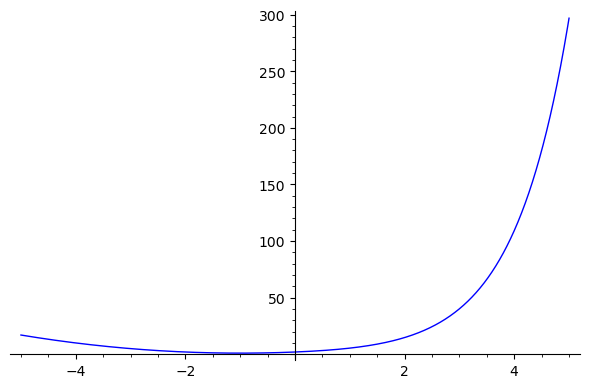

In [73]:

f1(x)=2*e^x; f2(x)=x^2+2*x+2
f=piecewise([[RealSet.open_closed(0, 5), f1(x)], [RealSet.closed(-5, 0), f2(x)]])
p=plot(f(x), x, -5, 5)
show(p)

#### <span style='color:#2196f3'>**Exercise**</span>

Consider the function $g(x, a)$ defined as:
$$g(x, a) =
\begin{cases}
	x^3 + ax & \text{if } x < 1 \\
	3x - 1 & \text{if }x \ge 1.
   \end{cases}$$
Specify the values of the parameter $a$ such that $g(x, a)$ is continuous at $x = 1$.

#### Solution:



We present the solution directly in Sage, without any comments (try to confirm the mathematical computation behind the code below)

In [74]:
var('a')
eq = (x^3 + a*x).limit(x=1, dir='-') == (3*x-1).limit(x=1, dir='+')
print(eq)
eq.solve(a)

a + 1 == 2


[a == 1]

#### <span style='color:#607d8b'>**Intermediate Value Theorem**</span>

Let $f : [a; b] \to \mathbb{R}$ be a continuous function. Then $f$ takes any given value between $f(a)$ and $f(b)$ at some point within $[a;b]$.

#### <span style='color:#607d8b'>**Corollary**</span>

If $f(a) \cdot f(b) < 0$ then there is $x \in [a;b]$ such that $f(x) = 0$.



#### <span style='color:#607d8b'>Bisection method</span>

There is a simple algorithm to find an approximation of this $x$ that is called **bisection method**.



In [75]:
def bisect_method(f, a, b, eps):
    '''Bisection method.
    Returns c, (a,b), where c is the midpoint of the interval [a;b],
    and it holds |f(c)| < eps, f(a)*f(b) < 0.
    '''
    eps = float(eps)
    while True:
        c = (a+b)/float(2)
        fa = f(a); fb = f(b); fc = f(c)
        if abs(fc) < eps: return c, (a,b)
        if fa*fc < 0:
            b = c
        elif fc*fb < 0:
            a = c
        else:
            raise ValueError("f must have a sign change in the interval (%s,%s)"%(a,b))


#### <span style='color:#2196f3'>**Example**</span>

Find $\sqrt[3]{3}$ by approximating the root of $f(x) = 3 - x^3$ on the interval $[1;2]$ via the method described above.



In [76]:
f(x) = 3 - x^3
(r, _) = bisect_method(f, 1, 2, 0.0000001)
r

1.4422495663166046

In [77]:
r^3

2.999999975096381


## 4.5.   <span style='color:#009688'>Derivatives</span>

We proceed with tasks on derivatives. We first recall some theoretical details on derivatives.


#### <span style='color:#607d8b'>**Theoretical notes on derivatives**</span>

Let $f$ be a real or complex function defined on an interval $A ⊂ R$ and $x_0 ∈ A$. If the limit
$$\lim_{x\to x_0}\frac{f(x) − f(x_0)}{x − x_0}= a$$
exists, the function $f$ is said to be differentiable at $x_0$, provided $a$ is finite. The value of the derivative at $x_0$, namely
$a$, is denoted by $f'(x_0)$ or $\frac{df}{dx} (x_0)$ or $\frac{d}{dx} f(x_0).$
If $a$ is finite, the derivative is also sometimes called **proper**. If $a$ is infinite, it is **improper**.
If $x_0$ is one of the boundary points of $A$, we arrive at one-sided derivatives (i.e., left-sided derivative and right-sided derivative).
If a function has a derivative at $x_0$, the function is said to be differentiable at $x_0$. A function which is **differentiable** at every point of a given interval is said to be **differentiable on the interval.**

Rules of differentiation:

1. $(cf)'(x) = c(f'(x))$, for every *real* or *complex* number $c$;
2. $(f+g)'(x) = f'(x)+g'(x)$
3. $(f\cdot g)'(x) = f'(x)g(x)+g'(x)f(x)$
4. $(\frac{f}{g})'(x) = \frac{f'(x)g(x)-g'(x)f(x)}{g^2(x)}$
5. $h(f(x))' = h(f(x))'\cdot f'(x)$



We can solve derivatives in SageMath in at least  three different ways:
1. by using limits via the command ${\tt{limit}}$;
2. by using ${\tt{diff()}}$ or ${\tt{derivative()}}$  functions;
3. by using SAGE function method ${\tt{.derivative()}}$.

We will explore the options that we can apply for any case via examples.

#### <span style='color:#2196f3'>**Exercise**</span>

Find the derivative of $f(x) = x^3$ in SageMath by apply the difinition of $f'$, and next use the ${\tt{diff}}$ function to verify the result of the first method.

####  Solution:

Let us first determine the derivative in question by using the definition and hence limits.
Recall that $f'(x)$ is defined as the limit
$$f'(x):=\lim_{h\to0} \frac{f(x+h)-f(x)}{h}$$ and we say that $f'(x)$ exists when this limit exists. 
In Sage this goes as follows: 

In [78]:
f(x)=x^3 # define our function

var('h') # create variable h

limit((f(x+h)-f(x))/h, h=0) # find the limit

3*x^2

Great! We received our result, that is, $f'(x)=(x^3)'=3x^2$. 
Let us now shorten the code with the built-in function ${\tt{diff()}}$, as suggested in the statement. 

In [79]:
diff(x^3,x) # first argument is the function and second one is variable to differentiate

3*x^2

Note that the same can be done with the  ${\tt{derivative()}}$ function, as follows:

In [80]:
derivative(x^3,x)

3*x^2

Finally, let us also use a third variant that Sage offers for the computation of the derivative of a  function, based on the  method ${\tt{derivative()}}$. 
This is essentially the same as above, but is written in the following form:

In [81]:
f(x)=x^3
f.derivative(x)

x |--> 3*x^2

This second version of the syntax is more like Python, and makes it clear that the derivative is an attribute, or method associated with the object f\(x\). 
In particular,  one could  also type ${\tt{f(x).derivative(x)}}$, as it is shown below:



In [82]:
f(x).derivative(x)

3*x^2

#### <span style='color:#2196f3'>**Exercise (evaluation of derivatives at certain points)**</span>

Find the particular value of derivative of $f(x)=x^3$ for $f'(3)$
Here we can also use two methods


${\color{red} \textsf{Hints:}}$
1. Create a function $df$ and just input a value
2. We can specify the variable after ${\tt{diff()(x=...)}}$, see below.

##### Solution:



Let us apply first the first method:

In [83]:
f(x)=x^3
df(x) = f.derivative(x) # or diff(f) or derivative(f)
df(3)

27

Let us also specify the details of another method, among those mentioned above, that one can apply to get the same answer:

In [84]:
f.derivative(x)(x=3) # or diff(f)(x=3) or derivative(f)(x=3)

27

Or we can type 

In [85]:
f(x).derivative(x)(x=3)


27

In general, we prefer more the second method.

#### <span style='color:#2196f3'>**Example**</span>

Find the derivative of the function $g(x)=5x^3\,e^(-2x^2)$ for all real numbers $x$ and next find $g'(1)$. Moreover, present a numerical approxiamtion of $g'(1)$.

In [1]:
g(x)=5*x^3*e^(-2*x^2)
dg(x)=derivative(g(x),x)
dg(1)

-5*e^(-2)

For the numerical approximation we can use the ${\tt{N()}}$ function:

In [2]:
N(dg(1))

-0.676676416183064

Similarly for another value:

In [4]:
N(dg(2))


-0.0872202832546531

With Sage we can also handle derivatives when other variables are involved. In this case,  all variables other than the variable of differentiation (the variable after the comma in the derivative command) are treated as constants (unspecified numbers). However, one should still introduce these varianbles as symbolic variables in Sage.


#### <span style='color:#2196f3'>**Exercise**</span>
Find the derivative of the function $\displaystyle f(x)=ax^4+\sqrt{b}x^3+\frac{c}{x}+e^{dx}$, where $a, b, c, d$ are positive constants and $x\in(0, +\infty)$.
Next evaluate the derivative at $x=1$

#### Solution:

In [9]:
var("a, b, c, d, x")
f(x)=a*x^4+sqrt(b)*x^3+(c/x)+e^(d*x)
df=diff(f(x), x)
print("The derivative of f is given by", df)

The derivative of f is given by 4*a*x^3 + 3*sqrt(b)*x^2 + d*e^(d*x) - c/x^2


To compute the value $f'(1)$ we can add the cell:

In [11]:
print("The deivative of f at x=1 is given by", diff(f(x), x)(x=1))

The deivative of f at x=1 is given by d*e^d + 4*a - c + 3*sqrt(b)


#### <span style='color:#2196f3'>**Application of first order derivatives (velocity of an object)**</span>

Recall that the velocity of a moving object is the derivative of its position function, and its acceleration is the derivative of its velocity function.  Next we will use the units $m/sec$ for velocity and $m/sec^2$ for acceleration (though one could instead use $km/h$ for velocity and respectively for acceleration).


#### <span style='color:#2196f3'>**Exercise**</span>

If the position of a moving object in time t is given by the function
$$
s(t)=(2t-3)^2-9, 
$$
determine the velocity and the acceleration of the object for general time $t$ and next for time $t=3$.

##### Solution

In [37]:
var("t")
s(t)=(2*t-3)^2-9 #the position function
u(t)=diff(s(t), t).factor() #the velocity
print("The velocity of the object at general time t is the function given by", u(t), "m/sec.")

The velocity of the object at general time t is the function given by 8*t - 12 m/sec.


In [38]:
var("t")
s(t)=(2*t-3)^2-9
u(t)=diff(s(t), t).factor()
a(t)=diff(u(t), t) #the acceleration
print("The acceleration of the object at general time t is the derivative of the velocity, given by", a(t), "m/sec^2.")
print("The velocity of the object at time t=3 is given by", u(3), "m/sec.")

The acceleration of the object at general time t is the derivative of the velocity, given by 8 m/sec^2.
The velocity of the object at time t=3 is given by 12 m/sec.


Hence the object is moving with constant acceleratiob 8m/sec^2 (assuming that we compute the velocity in m/sec). 

#### <span style='color:#2196f3'>**Higher order derivatives**</span>

The previous problem it could solved by a different approach, relying on second order derivatives (as the acceleration is the second derivatibe of the position function).
Usually, given a function $f : \mathbb{R}\to\mathbb{R}$ we denote the second derivative by $f''(x)=\frac{d}{df}f'(x)$. In general for higher order derivatives we use the notation
$$
f^{(3)}=\frac{d}{dx}f''(x)\,, \quad \ldots, \quad f^{(n)}(x)=\frac{d}{dx}f^{(n-1)}(x)\,.
$$
We call $f^{(n)}(x)$ the $n$th derivative of $f$ at $x$. See the 6th Chapter of the BG book for the formal definition of higher-order derivatives as limits.

#### <span style='color:#2196f3'>**Exercise**</span>

Find the 2nd order, 3rd order and 5th order derivatives  of the function $f(x)=x^5e^5$ with $x\in\mathbb{R}$.
Next evaluate the second-order derivative at $x=0$, at $x=1$ and at $x=-1$.


#### Solution:

One can use our previous functions and methods ${\tt{diff()}}$, ${\tt{derivative()}}$ or, ${\tt{f.derivative()}}$ and add a third argument \(or second if the variable is not specified\), which will show the order of the derivative that need to compute.



In [21]:
f(x)=x^5*e^5 # define function
diff(f, x, 2) #or derivative(f,x,2)) or f(x).derivative(2)
diff(f,x,3) # or derivative(f,x,3)) or f(x).derivative(3)
diff(f,x,5) # or derivative(f,x,3)) or f(x).derivative(3)
show("The second order derivative of f is given by:", diff(f,x,2)) # for a fancy output we  use show() function
show("The third order derivative of f is given by:", diff(f,x,3))
show("The fifth order derivative of f is given by:",  diff(f,x,5))

'The second order derivative of f is given by:' x |--> 20*x^3*e^5

'The third order derivative of f is given by:' x |--> 60*x^2*e^5

'The fifth order derivative of f is given by:' x |--> 120*e^5

To evaluate a higher-order derivative at a certain point we can  use the same approach as for the evaluation of the derivative of a function $f$.

In [22]:
f(x)=x^5*e^5 
diff(f, x, 2)(x=0)

0

Or we can type:

In [24]:
print("The second order derivative of f at x=0 equals to", diff(f, x, 2)(x=0))

The second order derivative of f at x=0 equals to 0


In [25]:
print("The second order derivative of f at x=1 equals to", diff(f, x, 2)(x=1))

The second order derivative of f at x=1 equals to 20*e^5


In case we need a numerical approximation of $f''(1)$ we can add:

In [26]:
print("The second order derivative of f at x=1 equals to", N(diff(f, x, 2)(x=1)))

The second order derivative of f at x=1 equals to 2968.26318205153


Similarly we can compute  $f''(-1)$:

In [28]:
print("The second order derivative of f at x=-1 equals to", N(diff(f, x, 2)(x=-1)))

The second order derivative of f at x=-1 equals to -2968.26318205153


#### <span style='color:#2196f3'>**Exercise**</span>

Find the acceleration of an object at time general time $t$ and at time $t=1/2$ sec, when its position function is given by $s(t)=-\frac{t}{(1+t^2)}+t^4$, with $t\geq 0$.

#### Solution:

In [29]:
var("t")
s(t)=-(t/(1+t^2))+t^4
a(t)=diff(s, t, 2)
show(a(t))

12*t^2 - 8*t^3/(t^2 + 1)^3 + 6*t/(t^2 + 1)^2

In [35]:
print("The acceleration of the object at time t=1/2 is", a(1/2), "m/sec^2.")

The acceleration of the object at time t=1/2 is 551/125 m/sec^2.


Or we could directly type:

In [36]:
var("t")
s(t)=-(t/(1+t^2))+t^4
print("The acceleration of the object at time t=1/2  is", diff(s, t, 2)(t=1/2), "m/sec^2.")

The acceleration of the object at time t=1/2  is 551/125 m/sec^2.


#### <span style='color:#2196f3'>**A few details on partial derivatives**</span>

Partial derivatives are  derivatives that can be used when you have a function of multiple variables. Unlike ordinary derivatives, which describe how a function changes with respect to one variable, partial derivatives measure how a function changes with respect to one variable while keeping all other variables constant. 
For instance, consider the function $f(x, y)=x^2y+3xy^2$. Then we have the following two first-order partial derivatives:

$$
\frac{\partial f}{\partial x}=\text{differentiation with respect to x}=2xy+3y^2.
$$

$$
\frac{\partial f}{\partial y}=\text{differentiation with respect to y}=x^2+6xy.
$$

For  more details see Chapter 8 in the BG book.

##### **Exercise**

Consider the function  $f(x,y)=x^5e^xy^5$. 
Find the 1st and 3rd order partial derivatives with respect to $x, y$.  


##### Solution:

In [87]:
var('y') # declare y variable
f(x,y) = x^5*e^x*y^5 # define function

show('1st order diff by x:', diff(f,x)) # differentiate by x 
show('1st order diff by y:', diff(f,y)) # differentiate by y
print('\n')

show('3rd order diff by x:', diff(f,x,3)) # differentiate by x 
show('3rd order diff by y:', diff(f,y,3)) # differentiate by y
print('\n')



'1st order diff by x:' (x, y) |--> x^5*y^5*e^x + 5*x^4*y^5*e^x

'1st order diff by y:' (x, y) |--> 5*x^5*y^4*e^x

'3rd order diff by x:' (x, y) |--> x^5*y^5*e^x + 15*x^4*y^5*e^x + 60*x^3*y^5*e^x + 60*x^2*y^5*e^x

'3rd order diff by y:' (x, y) |--> 60*x^5*y^2*e^x

#### <span style='color:#2196f3'>**Exercise**</span>

Find the first order and second order partial derivatives of $f(x, y)=x^5y^5$. 

In [88]:
show(diff(x^5*y^5, x))
show(diff(x^5*y^5, y))
show(diff(x^5*y^5,[x,y]))
show(diff(x^5*y^5,[y,x]))

5*x^4*y^5

5*x^5*y^4

25*x^4*y^4

25*x^4*y^4

### <span style='color:#607d8b'>Geometrical meaning of the derivative</span>

Derivatives allow us to get instantaneous rate of change or slope of a function at a given point. More specifically, the derivative at a point on a curve represents the slope of the tangent line to the curve at that point. Geometrically, the tangent line touches the curve at only one point and is the best linear approximation of the curve near that point. The derivative gives us information about the direction and steepness of the curve at any point, allowing us to analyze the behavior of the curve and make predictions about its future behavior. In essence, the derivative provides us with a powerful tool for understanding and analyzing the geometry of functions.

The geometric meaning of the derivative allows to approximate

$$f(x + h) = f(x) + \phi(x + h)h ≃ f(x) + f′(x)h$$

A real function is called increasing at $x_0$ of its domain, if for all points x of some neighbourhood of a point $x_0, f(x) > f(x_0)$ if $x > x_0$ and $f(x) < f(x_0)$ if $x < x_0$. A real function is increasing on an interval $A$ if $f(x)−f(y) > 0$ for all $x > y, x, y \in A$.
Similarly, a function is said to be decreasing at a point $x_0$ if and and only if there is a neighbourhood of the point $x_0$ such that $f(x) < f(x_0)$ for all $x > x_0$, while $f(x) > f(x_0)$ for all $x < x_0$ from this neighbourhood. A function is decreasing on an interval A if $f(x) − f(y) < 0$ for all $x > y, x, y \in A$. Thus a function having a non-zero finite derivative at a point is either increasing or decreasing at that point, according to the sign of the derivative.



#### <span style='color:#2196f3'>**Exercise**</span>

Find the derivative of $f(x)=x^2sin(x)$, and plot the tangent lines for $x_0=3$ and $x_1=-2.3$.

#### Solution:



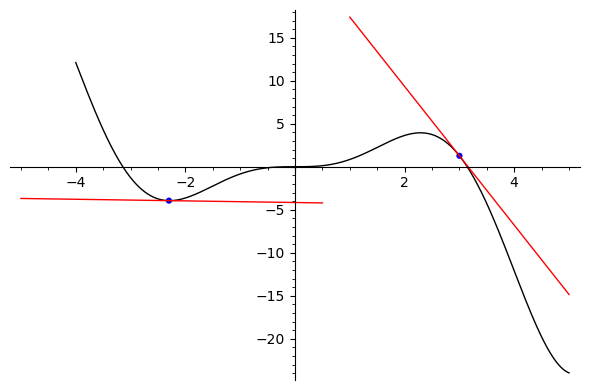

In [89]:

f(x) = x**2*sin(x)
df(x) = f.differentiate()
x0 = 3
x1 = -2.3
tang_line_1 = f(x0) + df(x0)*(x-x0)
tang_line_2 = f(x1) + df(x1)*(x-x1)

(plot(f, xmin=-4, xmax=5, color='black') +  # plot original function
 
plot(tang_line_1, xmin=1, xmax=5, color='red') + # plot first tangent line
plot(tang_line_2, xmin=-5, xmax=0.5, color='red') + # plot first tangent line 
 
point((x0,f(x0)), color='blue', size=20) + # plot first point of intersection
point((x1,f(x1)), color='blue', size=20)) # plot second point of intersection

#### <span style='color:#2196f3'>**Exercise**</span>

Find the local extrema for $f(x)=5x^3+2x^2-3x$. Find out whether there any maxima or minima.

#### Solution:



[x == (1/3), x == (-3/5)]


Second order derivative of f(x) in (x == (1/3)) = 14
x == (1/3) is a local minimum

Second order derivative of f(x) in (x == (-3/5)) = -14
x == (-3/5) is a local maximum


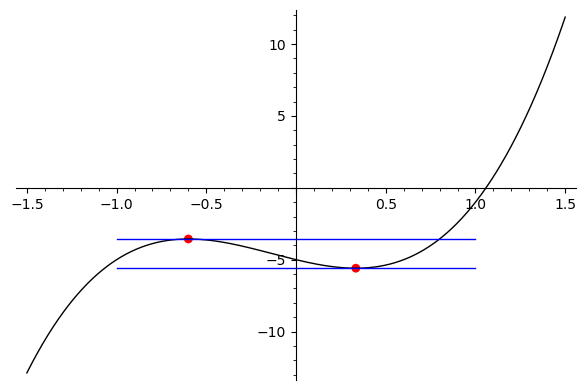

In [39]:

f(x) = 5*x**3 + 2*x**2 - 3*x - 5#x**2+(2*x**2)+3
# First order derivative
df(x) = f.differentiate()

# Solve for df(x)==0
results = solve(df(x)==0, x, domain='real')
show(results)

# Plot the function
plots = plot(f, xmin=-1.5, xmax=1.5, color='black')

for result in results:
    # Find second order derivative
    d2f = df.diff() # or f.diff(x,2)
    
    # Find out whether the point is maximum or minumum
    print("\nSecond order derivative of f(x) in ({0}) =".format(result),
          d2f(result.right()))
    if d2f(result.right()) > 0:
        print(result, 'is a local minimum')
    elif d2f(result.right()) < 0:
        print(result, 'is a local maximum')
    else:
        print(result,'needs more analysis')
    
    # Plot tangent lines and points
    tang_line = f(result.right()) + df(result.right())*(x-result.right())
    plots += plot(tang_line, color='blue') + point((result.right(), f(result.right())), color='red', size=40)

plots

#### <span style='color:#2196f3'>**Exercise (tangent lines)**</span>
Find the tangent line to the function 
$g(x)=x^4\, e^x$ for $x=2$. Next create  an illustration including the graph of $g$ and the tangent line at question.
 
 #### Solution:


'The tangent line of the function g(x) at x=2 is the line given by:' 48*(x - 2)*e^2 + 16*e^2

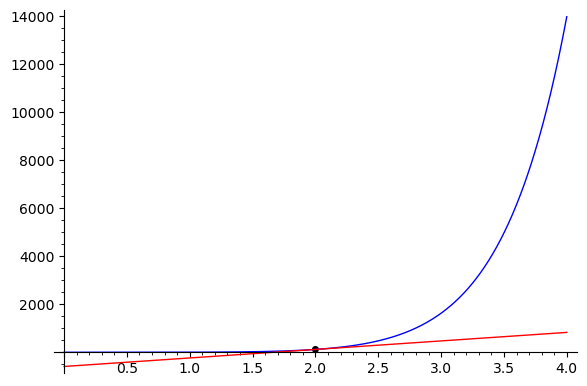

In [48]:
g(x)=x^4*e^(x)  
dg(x)=derivative(g(x),x)
tangent(x)=g(2)+dg(2)*(x-2)
show("The tangent line of the function g(x) at x=2 is the line given by:", tangent(x))
plot(g,xmin=0,xmax=4)+plot(tangent,xmin=0,xmax=4,color='red')+point((2,g(2)),color='black',size=25)

#### <span style='color:#2196f3'>**Exercise**</span>

Find the second derivative of $$h(x) = sin(x) + cos(x)$$

#### Solution:

Let us use Sage's symbolic calculus capabilities to find the first and second derivatives of the given function:

In [93]:
# Define the function h(x)
h(x) = sin(x) + cos(x)

# Find the first derivative of h(x)
dh = diff(h(x), x)

# Find the second derivative of h(x)
d2h = diff(dh, x)

# Simplify the second derivative using algebraic manipulation
show(d2h.simplify_full())


-cos(x) - sin(x)

### <span style='color:#607d8b'>Derivatives of polynomial functions</span>

Polynomials are some of the easiest and most commonly used class of functions that we encounter
in Mathematics. They can easily and efficiently be evaluated at every specific value and have very
nice properties: they are continuous everywhere, differentiable everywhere, and integrable on any
bounded interval. Finding the derivatives or antiderivatives of a polynomial are very easy tasks too.



#### <span style='color:#2196f3'>**Exercise**</span>

Find the derivative of the  polynomial function given below at $x=2$: $$f(x) = x^3 - 4x^2 + 2x - 7.$$ 

#### Solution:

We can use SAGE's symbolic calculus capabilities to find the derivative of the function and then evaluate it at x = 2.



In [40]:
# Define the function f(x)
f(x) = x^3 - 4*x^2 + 2*x - 7

# Find the derivative of f(x)
df = diff(f(x), x)

# Evaluate the derivative at x = 2
df.subs(x=2)

-2

#### <span style='color:#2196f3'>**Exercise**</span>

Find the derivative of $$g(x) = (x^2 + 3x + 1)/(x + 2)$$

#### Solution: 
We can use the quotient rule to find the derivative of g(x) and simplify the expression.

In [41]:
# Define the function g(x)
g(x) = (x^2 + 3*x + 1)/(x + 2)

# Find the derivative of g(x)
dg = diff(g(x), x)

# Simplify the derivative using algebraic manipulation
show(dg.simplify_full())


(x^2 + 4*x + 5)/(x^2 + 4*x + 4)

## 4.6.  <span style='color:#009688'> Elementary  theorems on derivatives</span>

We now proceed with some elementary properties of derivatives and in particular some basic theorems related to them.

#### <span style='color:#607d8b'>Derivative of the inverse function</span>

If $f$ is a real-valued function differentiable at $y_0$, such that the inverse $f^{−1}(x)$ exists on a neighbourhood of the value $x_0 = f(y_0)$ and $f′(y_0) \neq0$, then $$(f^{-1})′(x_0) = \frac{1}{f′(f^{-1}(x_0))} = \frac{1}{f′(y_0)}$$

#### <span style='color:#607d8b'>Rolle’s theorem</span>

Assume that the function $f : R → R$ is continuous on a closed bounded interval [a, b] and differentiable inside this interval. If $f(a) = f(b)$, then there is a number $c ∈ (a, b)$ such that $f′(c) = 0$

#### <span style='color:#607d8b'>Lagrange’s mean value theorem</span>

Assume the function $f : R → R$ is continuous on an interval [a, b] and differentiable at all points inside this interval. Then there is a number $c ∈ (a, b)$ such that $$f′(c) = (f(b) − f(a))/(b − a)$$

#### <span style='color:#607d8b'>Cauchy’s mean value theorem</span>

Let functions $y = f(t)$ and $x = g(t)$ be continuous on an interval \[a, b\] and differentiable inside this interval. Further, let $g′(t) \neq 0$ for all $t ∈ (a, b)$ and $g(b) \neq g(a)$. Then there is a point $c ∈ (a, b)$ such that $$\frac{f(b)-f(a)}{g(b)-g(a)} = \frac{f′(c)}{g′(c)}$$

##### <span style='color:#607d8b'>**The l'Hopital's rule**</span>

Finally let us recall the l'Hopital's rule, which is related to differentiation. 

Assume that $f$ and $g$ are  differentiable functions on an open interval $I\subset\mathbb{R}$, except possibly at a point $c\in I$.  Suppose
that $\lim_{x\to c}f(x)=\lim_{x\to c}g(x)=0$, or $\lim_{x\to c}f(x)=\lim_{x\to c}g(x)=\pm\infty$, and $g'(x)\neq 0$ for all $x\in I$ with $x\neq c$. Moreover, assume that
the limit $\lim_{x\to c}\frac{f'(x)}{g'(x)}$ exists. Then the  l'Hopital's rule states that
$$
\lim_{x\to c}\frac{f(x)}{g(x)}=\lim_{x\to c}\frac{f'(x)}{g'(x)}\,.
$$

---



#### <span style='color:#2196f3'>**Exercise (critical points)** </span>

Find the critical points of $f(x)=\frac{x^2-1}{4x^2+8}$. Next plot $f$ for $-2\leq x\leq 2$.

#### Solution:



1/4*(x^2 + 1)/(x^2 + 2)

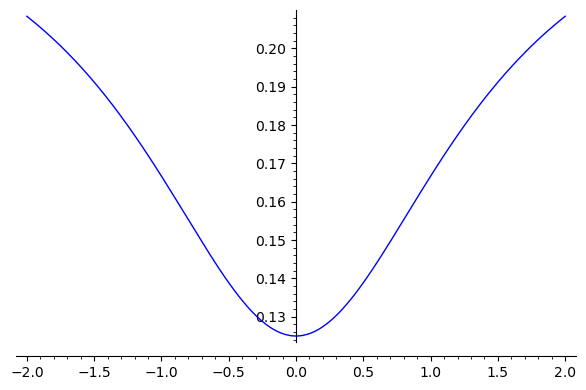

1/2*x/(x^2 + 2) - 1/2*(x^2 + 1)*x/(x^2 + 2)^2

[x == 0]

In [43]:
# Define the variable
x = var('x')

# Define the  P(x)
f = (x^2+1)/(4*x^2+8)

show(f.factor())

# Step 1: Plot the polynomial to visualize its behavior
plotf=f.plot(-2, 2)
show(plotf)

# Step 2: Compute the first derivative of f(x)
f_prime = diff(f, x)
show(f_prime)

# Step 3: Solve f'(x) = 0 to find critical points (local maxima and minima)
critical_points = solve(f_prime == 0, x)
show(critical_points)

#### <span style='color:#2196f3'>**Exercise (critical points)**</span>

Find the critical points of the function $P(x)=4x^3-3x+2$. Next plot in one figure the given function $P$ and its \(first\) derivative and mark the c Use green color for the graph of the derivative.

#### Solution:



'The derivative of f is given by:' 12*x^2 - 3

'The critical points of f are the points:' [x == (-1/2), x == (1/2)]

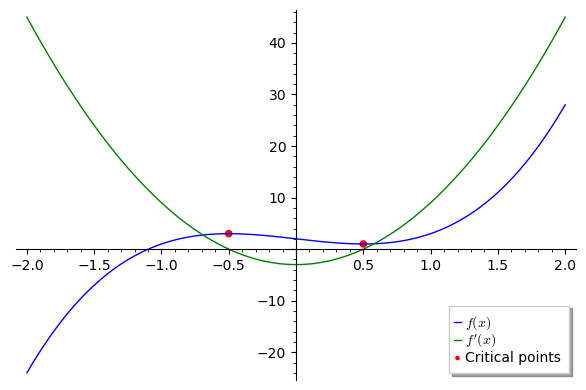

In [18]:
# Define the variable and the function f(x)
x = var('x')
f = 4*x^3 - 3*x + 2

# Compute the derivative of f(x)
f_prime = diff(f, x)
show("The derivative of f is given by:", f_prime)

criticalp = solve(f_prime== 0, x)
show("The critical points of f are the points:", criticalp)

# Plot f(x) and f'(x)
p1 = plot(f, (x, -2, 2), color='blue', legend_label=r"$f(x)$")
p2 = plot(f_prime, (x, -2, 2), color='green', legend_label=r"$f'(x)$")

# Mark the critical points
critical_points = [(-1/2, f.subs(x=-1/2)), (1/2, f.subs(x=1/2))]
p3 = point(critical_points, color='red', size=30, legend_label="Critical points")

# Combine the plots
combined_plot = p1 + p2 + p3

# Show the plot with labels and legend
combined_plot.show()



Note that as the 2 critical points of $f$ are solutions of the equation $f'(x)=0$, we can attain them as follows:


In [15]:
xa = criticalp [0].rhs()
show("The first critical point of f is the point:", xa)
xb = criticalp [1].rhs()
show("The second critical point of f is the point:", xb)

'The first critical point of f is the point:' -1/2

'The second critical point of f is the point:' 1/2

This gives us an alternative to rewrite the program for marking these critical points as follows


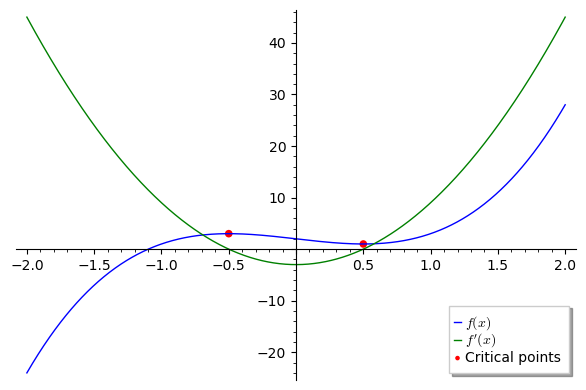

In [13]:
# Plot f(x) and f'(x)
p1 = plot(f, (x, -2, 2), color='blue', legend_label=r"$f(x)$")
p2 = plot(f_prime, (x, -2, 2), color='green', legend_label=r"$f'(x)$")
# Mark the critical points
critical_points = [(xa, f.subs(x=xa)), (xb, f.subs(x=xb))]
p3 = point(critical_points, color='red', size=30, legend_label="Critical points")
# Combine the plots
combined_plot = p1 + p2 + p3
# Show the plot with labels and legend
combined_plot.show()

#### <span style='color:#2196f3'>**Exercise (Rolle's theorem)**</span>

Verify  Rolle's theorem for the function $f(x)=x^2-4x+3$ in the interval $[1, 3]$.

#### Solution

0

0

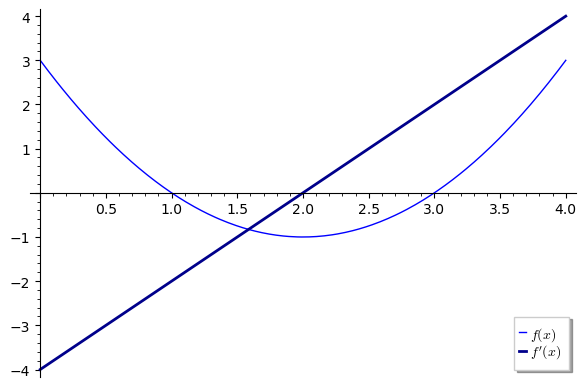

[x == 2]

In [42]:
# Define the function f(x)
x = var('x')
f = x^2 - 4*x + 3

plotf=plot(f, 0, 4,  legend_label=r"$f(x)$")
 

# Check if f(1) = f(3)
f_at_1 = f.subs(x=1)
show(f_at_1)
f_at_3 = f.subs(x=3)
show(f_at_3)



# Derivative of f(x)
f_prime = diff(f, x)

plotf_prime=plot(f_prime, 0, 4, color="darkblue", thickness=2,  legend_label=r"$f'(x)$")
show(plotf+plotf_prime)

# Find c such that f'(c) = 0 by solving f'(x) = 0
c_value = solve(f_prime == 0, x)
show(c_value)




## 4.7.   <span style='color:#009688'> Series</span>


Recall that 
a series is the sum of the terms of a sequence, usually denoted by

$$\sum_{n=1}^{\infty} a_n,$$

where $a_n$ is the $n$th term of the sequence.
If the sequence $S_n = \sum_{k=1}^n a_k$ converges to a limit $L$ we write $\sum_{n=1}^{\infty} a_n = L$.
If the sequence $S_n$ does not converge to a limit, then the series $\sum_{n=1}^{\infty} a_n$ is said to diverge.

A geometric series is a series of the form $\sum_{n=0}^{\infty} ar^n$, where $a$ and $r$ are constants. The sum of a geometric series is given by:

$$ \sum_{n=0}^\infty a r^n = \frac{a}{1-r}, \text{ if } |r| < 1. $$ 

A telescoping series is a series in which most of the terms cancel out:

$$ \sum_{n=1}^\infty (a_n - a_{n-1}) = \lim_{n \to \infty} a_n - a_0 $$

The sum of a series can be computed in SageMath by using the ${\tt{sum()}}$ function. The syntax is ${\tt{sum(f, x, a, b)}}$, where f is the function to be summed, x is the variable of summation, a is the starting index of summation, and b is the ending index of summation.   



#### <span style='color:#2196f3'>**Example**</span>

Consider a series
$$ \sum_{k=0}^\infty x^k, $$
that converges if $|x| < 1$ and is equal to 
$$ \frac{1}{1 - x}. $$

In [94]:
var('x')
var('n')
assume(abs(x) < 1)
print(sum(x^n, n, 0, oo))

-1/(x - 1)


Let us now compute a partial sum


In [95]:
reset('x')
var('x')
var('m')

# diverges if abs(x) >= 1 
print(sum(x^n, n, 0, m))

(x^(m + 1) - 1)/(x - 1)


#### <span style='color:#2196f3'>**Exercise**</span>

Use SageMath to compute the sum of the series $\sum_{n=1}^{\infty} \frac{1}{n^2}$.

#### Solution:

In [96]:
var('n')
sum(1/n^2, n, 1, oo)

1/6*pi^2

#### <span style='color:#2196f3'>**Exercise**</span>

Compute the sum of the series $\sum_{n=0}^{\infty} \frac{(-1)^n}{2n+1}$.

#### Solution:

In [97]:
var("n")
sum((-1)^n/(2*n+1), n, 0, oo)

1/4*pi

#### <span style='color:#2196f3'>**Exercise**</span>

Find the value of $\sum_{n=1}^{\infty} \frac{1}{n(n+1)}$ using partial fraction decomposition. Verify in this way that the sum converges and compare the result to the value of the telescoping sum $\sum_{n=1}^{\infty} \left(\frac{1}{n}-\frac{1}{n+1}\right)$.

#### Solution:

In [98]:
var("n")
sum(1/(n*(n+1)), n, 1, oo)

1

On the other hand we see that:

In [99]:
sum(1/n-1/(n+1), n, 1, oo)  #hence the claim

1

#### <span style='color:#2196f3'>**Exercise**</span>

Compute the sum of the series $\sum_{n=0}^{\infty} \frac{x^n}{n!}$.

#### Solution:

In [100]:
sum(x^n/factorial(n), n, 0, oo)

e^x

We proceed by analyzing the use of power series in Sage. Below is an example of computing the square root of 2 using power series.


#### <span style='color:#2196f3'>**Example**</span>

Compute the square root of 2 using power series.

#### **Solution:**

In [101]:
K.<t> = PowerSeriesRing(QQ, 20)

In [102]:
# B is a power series of sqrt(1 + t) up to power 14
B = sqrt(1+t).truncate(15); B

-185725/33554432*t^14 + 52003/8388608*t^13 - 29393/4194304*t^12 + 4199/524288*t^11 - 2431/262144*t^10 + 715/65536*t^9 - 429/32768*t^8 + 33/2048*t^7 - 21/1024*t^6 + 7/256*t^5 - 5/128*t^4 + 1/16*t^3 - 1/8*t^2 + 1/2*t + 1

In [103]:
# our approximation for sqrt(2)
sqrt2approx = B(1).n()
sqrt2approx

1.41159650683403

In [104]:
# its square is close to 2
(sqrt2approx^2).n()

1.99260469810604

This example shows how to approximate $\pi$ ising power series.


In [105]:
# C is the series for acos(t)
C = sin(t).reverse(); C

t + 1/6*t^3 + 3/40*t^5 + 5/112*t^7 + 35/1152*t^9 + 63/2816*t^11 + 231/13312*t^13 + 143/10240*t^15 + 6435/557056*t^17 + 12155/1245184*t^19 + O(t^20)

In [106]:
# we know that acos(0.5) = pi/6, so we should get pi
6*C.truncate(15)(0.5)

3.14158942531912

#### <span style='color:#2196f3'>**An illustration of a telescoping series**</span>



Series of the form  $\sum_{n=1}^{+\infty}a_{n}$ with $a_{n}=b_{n}-b_{n+1}$ are referred to as telescoping series.
For example, a  telescoping series is given below:


$$ \frac{1}{1\cdot 2} + \frac{1}{2\cdot 3} + \frac{1}{3\cdot 4} + \dots + \frac{1}{k\cdot (k+1)} + \dots = (1 - \frac{1}{2}) + (\frac{1}{2} - \frac{1}{3}) + (\frac{1}{3} - \frac{1}{4}) + \dots + (\frac{1}{k} - \frac{1}{k+1}) + \dots = 1 - \frac{1}{2} + \frac{1}{2} - \frac{1}{3} + \frac{1}{3} - \dots - \frac{1}{k} + \frac{1}{k} -  \frac{1}{k+1} + \frac{1}{k+1} - \dots = 1 $$

To illustrate this series we can proceed as follows:

In [107]:
var('n'); var('k')
a = 1/(k*(k+1))


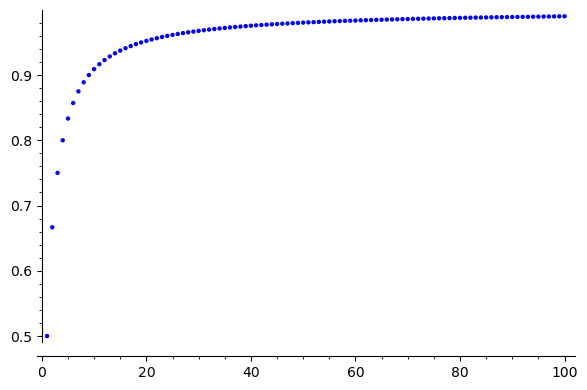

In [108]:

B=Graphics()
for n in srange(1, 100+1):
    B=B+points((n, sum(1/(k*(k+1)), k, 1, n)))
B


## 4.8.   <span style='color:#009688'> Taylor polynomials \(Taylor expansions\)</span>

We now want to approximate functions, by Taylor polynomials.

Taylor polynomials  are mathematical approximations of a function using a series of polynomials. Specifically, they are a way of representing a function as an infinite sum of terms, where each term is a polynomial multiplied by a power of the independent variable.

The Taylor polynomial of a function $f(x)$ centered at $x=a$ is given by:

$$f(x) = f(a) + f'(a)(x-a) + f''(a)/2!(x-a)^2 + f'''(a)/3!(x-a)^3 + ... + f^{(n)}(a)/n!(x-a)^n + R_n(x)$$

where 

- $f^{(n)}(a)$ denotes the $nth$ derivative of $f(x)$ evaluated at $x=a$;
- $R_n(x)$ is the remainder term of the $nth$-degree Taylor polynomial.

The first few terms of the Taylor polynomial are given by:

- *First-degree Taylor polynomial* (also known as the tangent line approximation):
$f(x) ≈ f(a) + f'(a)(x - a)$

- *Second-degree Taylor polynomial*:
$f(x) ≈ f(a) + f'(a)(x - a) + f''(a)/2!(x - a)^2$

- *Third-degree Taylor polynomial*:
$f(x) ≈ f(a) + f'(a)(x - a) + f''(a)/2!(x - a)^2 + f'''(a)/3!(x - a)^3$

- *Fourth-degree Taylor polynomial*:
$f(x) ≈ f(a) + f'(a)(x - a) + f''(a)/2!(x - a)^2 + f'''(a)/3!(x - a)^3 + f^(4)(a)/4!(x - a)^4$

and so on. As the degree of the polynomial increases, the approximation gets closer to the actual value of the function.



In SageMath we can find the Taylor polynomial of a given function $f(x)$ in two ways:

- apply the  ${\tt{taylor(f(x), x, a, n)}}$ function;
- apply the  ${\tt{.taylor(x,a,n) }}$ SAGE function method.

Let us present some examples.



#### <span style='color:#2196f3'>**Exercise**</span>

For the function $\sin(x)$ find the  Taylor polynomial of degree at most 5, around $0$.

#### Solution:

In [43]:
show("The Taylor polynomial of f, of degree at most 5, is the polynomial:", taylor(sin(x), x, 0, 5))

'The Taylor polynomial of f, of degree at most 5, is the polynomial:' 1/120*x^5 - 1/6*x^3 + x

Or we could directly type:

In [110]:
show(sin(x).taylor(x, 0, 5))

1/120*x^5 - 1/6*x^3 + x

#### <span style='color:#1186f3'>**Remark**</span>


To get a better view of  how the approximation works, one can plot both  the given functions as follows \(below we will described another procedure for doing this\)


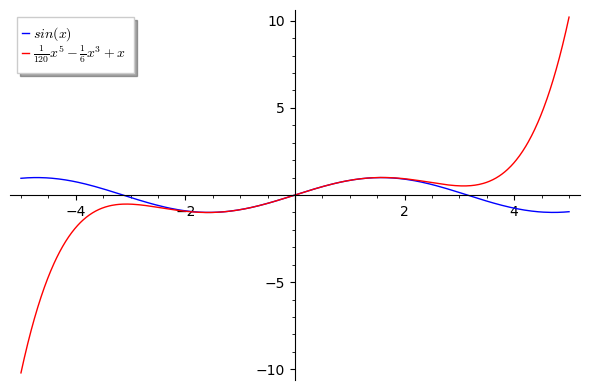

In [111]:
(
    plot(sin(x),
      xmax=5,
      xmin=-5,
      legend_label=r'$sin(x)$')
 +  plot(taylor(sin(x), x, 0, 5),
      xmax=5,
      xmin=-5,
      color='red',
      legend_label=r'$\frac{1}{120}x^5-\frac{1}{6}x^3+x$')
)

 As you can see our Tailor polynomial of degree 5 approximates the function pretty well to some extent

#### <span style='color:#2196f3'>**Exercise**</span>

For the exponential function $f(x)=e^x$ find the Taylor polynomial of degree at most 10, around 0.

#### Solution:

In [46]:
show("The Taylor polynomial in question has the form:", taylor(e^x, x, 0, 10))

'The Taylor polynomial in question has the form:' 1/3628800*x^10 + 1/362880*x^9 + 1/40320*x^8 + 1/5040*x^7 + 1/720*x^6 + 1/120*x^5 + 1/24*x^4 + 1/6*x^3 + 1/2*x^2 + x + 1

#### <span style='color:#2196f3'>**Exercise**</span>

For the function $f(x)=x^2+\log(x)$ find the Taylor polynomial of degree 2 and 8, for x=3. Moreover, plot the   approximations.

#### Solution:

In [113]:
f(x) = x^2+log(x)

taylor_2_deg = taylor(f(x), x, 3, 2)
taylor_8_deg = taylor(f(x), x, 3, 8)

show(taylor_2_deg)
show(taylor_8_deg)

17/18*(x - 3)^2 + 19/3*x + log(3) - 10

-1/52488*(x - 3)^8 + 1/15309*(x - 3)^7 - 1/4374*(x - 3)^6 + 1/1215*(x - 3)^5 - 1/324*(x - 3)^4 + 1/81*(x - 3)^3 + 17/18*(x - 3)^2 + 19/3*x + log(3) - 10

We can check the accuracy of approximation near the point $a$

In [114]:
print('Original function value at x=3:',  round(f(x=3.1),10),
      '\n2nd degree Taylor aproximation:', round(taylor_2_deg(x=3.1), 10),
      '\n8th degree Taylor aproximation:', round(taylor_8_deg(x=3.1), 10)
)

Original function value at x=3: 10.7414021115 
2nd degree Taylor aproximation: 10.7413900664 
8th degree Taylor aproximation: 10.7414021115


As we can see, the higher the degree of approximation, the more precise are the values near the center $a$.  Let us now  plot the approximations:

verbose 0 (3899: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 47 points.


verbose 0 (3899: plot.py, generate_plot_points) Last error message: 'Unable to compute f(-0.01964549734289004)'


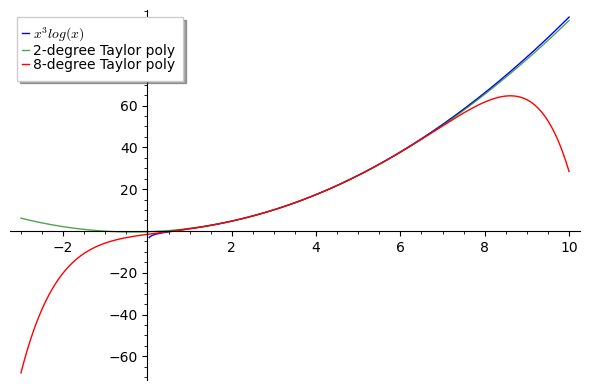

In [115]:
(
    plot(f,
      xmax=10,
      xmin=-3,
      legend_label=r'$x^3log(x)$')
 +  plot(taylor_2_deg,
      xmax=10,
      xmin=-3,
      color='green',
      alpha=0.7,
      legend_label='2-degree Taylor poly')
 +  plot(taylor_8_deg,
      xmax=10,
      xmin=-3,
      color='red',
      legend_label='8-degree Taylor poly')
)



#### <span style='color:#2196f3'>**Exercise \(optional\) \- Construction of a Taylor series function in Python**</span>

The following three exercises are optional, as we dont use built-in functions from  Sage to study Taylor series. 

In these examples we are totally based on Python so one may skip them.

Construct your own Taylor series Sage function for $f(x)=\sin(x)$.  Note that this function should satisfy the following:

- It takes as an input the point x\_0 around which we want to consider the Taylor expansion.
- It takes as an input the function f for which the Taylor series is computed.
- It takes as an input the order at which we want to stop the Taylor expansion. 
- The resulting Taylor series is a function of one free variable, i.e., it can be evaluated at some point x\_value

#### Solution:

A possible solution goes as follows: 



In [116]:
# Import necessary module
import matplotlib.pyplot as plt
import numpy as np

# Define the variable and function
x = var('x')
f = function('f')(x)
f = sin(x)

# Define a function to compute the Taylor polynomial
def taylor_series(x_value, x0, f, order):
    approximation = 0
    for n in range(order + 1):
        term = diff(f, x, n).subs(x=x0) * (x_value - x0)**n / factorial(n)
        approximation += term
    return approximation



We can pick some concrete inputs to see that our Sage function "${\tt{taylor\_series}}$" for Taylor polynomial works as it should. For example, Taylor polynomial of degree 5 of sin\(x\) at 0 is



In [117]:
show(taylor_series(x, 0, f, 5))


1/120*x^5 - 1/6*x^3 + x

Notice that Taylor polynomial of degree 6 of sin\(x\) at 0 is the same as the degree 5 Taylor polynomial



In [119]:
show(taylor_series(x, 0, f, 6))

1/120*x^5 - 1/6*x^3 + x

This is becaue sin\(x\) is an odd function, and thus the Taylor series contains only summands with odd exponents. Indeed, observe the change if we shift to degree 7



In [120]:
show(taylor_series(x, 0, f, 7))


-1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x

#### <span style='color:#2196f3'>**Exercise (optional)**</span>

Compare the graphs of the Taylor polynomials of the sin function, centered at the same point $x_0=0$. 

##### Solution:

(Note that the Sage cell given below will work only if the previous cell, where the function "${\tt{taylor\_series}}$" is defined, has already been compiled).


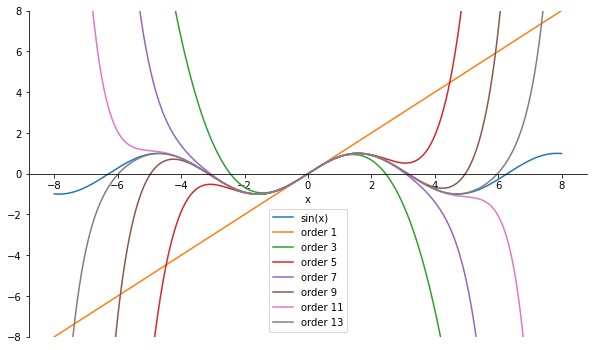

In [121]:
# Define the x range
x_values = np.linspace(-8, 8, 1000)

# Plot the function and the Taylor polynomial approximations
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Move bottom spine (x-axis) to y=0
ax.spines['bottom'].set_position(('data',0))

ax.plot(x_values, np.sin(x_values), label='sin(x)')

# Calculate the Taylor polynomial approximations and plots
for order in range(1,15, 2):
    taylor_approximation = [taylor_series(val, 0, f, order) for val in x_values]
    ax.plot(x_values, taylor_approximation, label=f'order {order}')

# Set the x axis label
ax.set_xlabel('x')

# Set the y-axis limits
ax.set_ylim([-8, 8])

# Show the legend
ax.legend()

# Show the plot 
plt.show()

#### <span style='color:#2196f3'>**Exercise (optional)**</span>

Repeat the above procedure  and display a complete code for the computation and visualization of Taylor polynomials of the exponential function  around the origin.  
In particular, chose to display the graphs of Taylor polynomials of orders $4,5, \ldots, 9$.  \(Note that $e^x$ is neither odd, nor an even function, so there is no reason to expect some vanishing of terms in the Taylor expansion, as we saw above  for the case of $\sin(x)$\).

#### Solution:



In [122]:
# Calculate the Taylor polynomials of degrees k = 1,2,...5
for k in range(1,6):
    print('order', k, 'Taylor polynomial:')
    show(taylor_series(x, 0, exp(x), k))

order 1 Taylor polynomial:


x + 1

order 2 Taylor polynomial:


1/2*x^2 + x + 1

order 3 Taylor polynomial:


1/6*x^3 + 1/2*x^2 + x + 1

order 4 Taylor polynomial:


1/24*x^4 + 1/6*x^3 + 1/2*x^2 + x + 1

order 5 Taylor polynomial:


1/120*x^5 + 1/24*x^4 + 1/6*x^3 + 1/2*x^2 + x + 1

Let us now display  the code for the computation and visualization of Taylor polynomials of order $4, 5, \ldots, 9$  of $e^x$ around $0$.


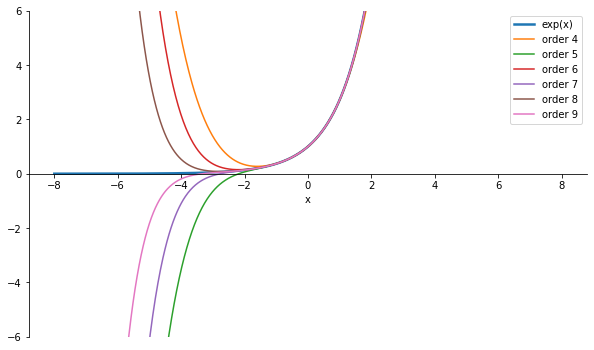

In [123]:
# Import necessary module
import matplotlib.pyplot as plt
import numpy as np

# Define the variable and function
x = var('x')
f = function('f')(x)
f = np.exp(x)

# Define a function to compute the Taylor polynomial
def taylor_series(x_value, x0, f, order):
    approximation = 0
    for n in range(order + 1):
        term = diff(f, x, n).subs(x=x0) * (x_value - x0)**n / factorial(n)
        approximation += term
    return approximation

# Define the x range
x_values = np.linspace(-8, 8, 1000)

# Plot the function and the Taylor polynomial approximations
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Move bottom spine (x-axis) to y=0
ax.spines['bottom'].set_position(('data',0))

ax.plot(x_values, np.exp(x_values), label='exp(x)', linewidth=2.5)    

# Calculate the Taylor polynomial approximations and plot them
for order in range(4,10):
    taylor_approximation = [taylor_series(val, 0, f, order) for val in x_values]
    ax.plot(x_values, taylor_approximation, label=f'order {order}')

    
# Set the x axis label
ax.set_xlabel('x')

# Set the y-axis limits
ax.set_ylim([-6, 6])

# Show the legend
ax.legend()

# Show the plot
plt.show()



## 4.9.   <span style='color:#009688'> Integration</span>


We now proceed with learning how to compute simple integrals via Sage. First we recall some theoretical background.


#### <span style='color:#2196f3'>**Theoretical remarks on integration**</span>

An **integral** is a mathematical concept that expresses the area under a curve. It is a way to calculate the length, area, or volume of an irregular object or shape. There are two types of integrals, definite and indefinite. 

A **definite integral** is used to find the area under a curve between two specific points. It is written as:

$$\int_a^b f(x) \, dx$$

where $f(x)$ is the function being integrated, $a$ is the lower limit and $b$ is the upper limit of integration.

An **indefinite integral**, also called an *antiderivative*, is the set of all functions that would have $f(x)$ as their derivative. It is written as:

$$\int f(x) \, dx $$

Here are some common integrals:

1. $\int (a) dx = ax + C$, where $a$ is a coefficient, and $C$ is a constant of integration.
2. $\int x^n dx = \frac{x^{n+1}}{n+1} + C$, where $n \neq -1$.
3. $\int \frac{dx}{x} = \log{|x|} + C$.
3. $\int a^x dx = \frac{a^x}{\ln{x}} + C$.
4. $\int e^x dx = e^x + C$.
5. $\int \cos(x) dx = \sin(x) + C$.
6. $\int \sin(x) dx = -\cos(x) + C$.



Now,  in order to compute/find  the **definite** integral $ \int_a^b f(x) dx $ we can use:

1. `integral(f(x), x, a, b)` function;
2. `f.integral(x,a,b) or f.integrate(x,a,b)` methods.

To find the **indefinite** integral we can use the same:

1. `integral(f(x), x)` function;
2. `f.integral(x) or f.integrate(x)` methods.

but we need to omit the $a$ and $b$ parameters, lets have a look


#### <span style='color:#2196f3'>**Remark**</span>
Note that Sage does not add the constant of integration (the $C$ constant posed above)






#### <span style='color:#2196f3'>**Example**</span>

Conside the function $f(x)=x^3-7x+1$. 

1) Use Sage to plot the graph of $f$ for $-2\leq x\leq 2$ and the area bounded by the graph of $f$ an the $x$-axis (andf the vertical lines $x=\pm 2$).

2) Compute the integral $\displaystyle\int_{-2}^{2}f(x)dx$ and next provide a geometric interpretation.

#### Solution:

In [110]:
f(x)=x^3-7*x+1
a=-2
b=2
plot(f(x), (x, a, b), color="darkgreen", figsize=4)

To mark the region bounded by the graph of $f$, the $x$-axis and the lines $x=\pm 1$, we can instead type:

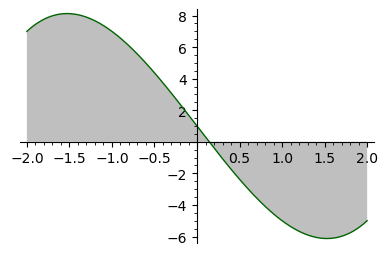

In [111]:
plot(f(x), (x, a, b), color="darkgreen", figsize=4, fill= True, fillcolor="grey")

In [112]:
integral(f(x), x, a,  b)

4

##### General  geometric interpretation:

The integral $\displaystyle\int_{a}^{b}f(x)dx$, when it exists,   represents the net area between the curve of the function $f(x)$, and the $x$-axis, over the interval $[a, b]$

For our case  the integral represents the signed area between the curve of $f(x)=x^3-5x+1$, the $x$-axis and the vertical lines $x=\pm 2$. Here, by the term signed area we mean that if the curve is above the $x$-axis, then the area contributes positively to the integral. If the curve is below the $x$-axis, 
then the area contributes negatively.

The total area is "net" in the sense that the areas above the 
$x$-axis are positive, and those below the 
$x$-axis are negative. Thus, if part of the curve lies above the 
$x$-axis and part lies below, the positive and negative areas are subtracted from each other.

#### <span style='color:#2196f3'>**Example (Riemann sums)**</span> 

For the theory on Riemann sums we refer to Chapter 6 in the BG book. Below we will use the function $f(x)=x^3-7x+1$ to illustrate them and also explain how we can use them to approximate an integral.

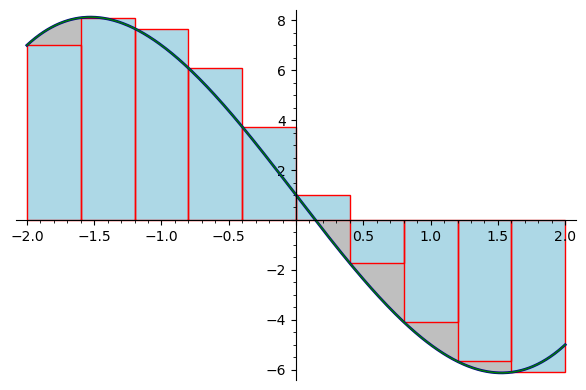

In [1]:
f(x)=x^3-7*x+1
a=-2
b=2
n=10
### r=0 for a left Riemann sum, r=1 for a right Riemman sum, r=1/2 for a middle on
r=0
delta=(b-a)/n; rdelta=r*delta; xk=a; L=[]; S=0
for k in range(n):
    L=L + [(xk, 0)]
    y=f(xk+rdelta)
    S=S + y
    L=L + [(xk, y)]
    xk= xk + delta
    L=L + [(xk, y)]
L=L + [(xk, 0)]
G=plot(f(x), (x, a, b), color="darkblue", thickness=2)
G=G+plot(f(x), (x, a, b), color="green", thickness=1, fill=True, fillcolor="grey")
G=G+polygon(L, edgecolor="red", color="lightblue")

G.show(aspect_ratio="automatic", figsize=6)

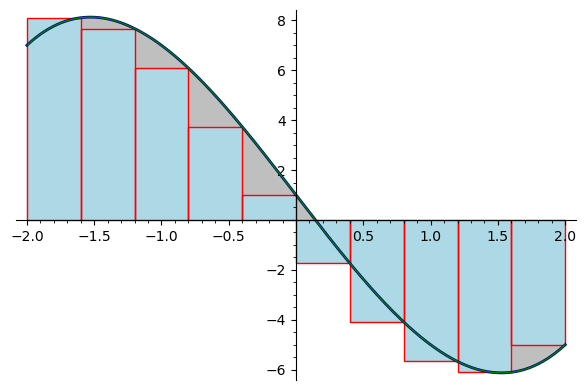

In [170]:
f(x)=x^3-7*x+1
a=-2
b=2
n=10
### r=0 for a left Riemann sum, r=1 for a right Riemman sum, r=1/2 for a middle on
r=1
delta=(b-a)/n; rdelta=r*delta; xk=a; L=[]; S=0
for k in range(n):
    L=L + [(xk, 0)]
    y=f(xk+rdelta)
    S=S + y
    L=L + [(xk, y)]
    xk= xk + delta
    L=L + [(xk, y)]
    L=L + [(xk, 0)]
G=plot(f(x), (x, a, b), color="darkblue", thickness=2)
G=G+plot(f(x), (x, a, b), color="green", thickness=1, fill=True, fillcolor="grey")
G=G+polygon(L, edgecolor="red", color="lightblue")

G.show(aspect_ratio="automatic", figsize=6)

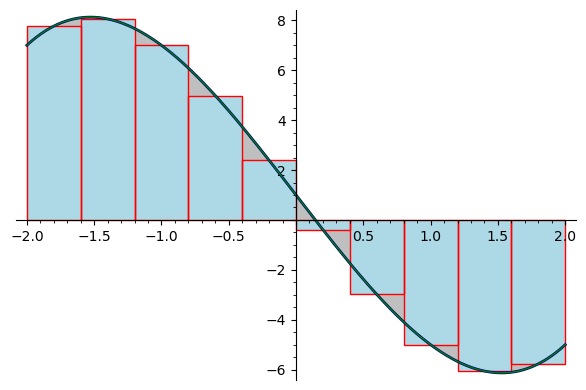

In [169]:
f(x)=x^3-7*x+1
a=-2
b=2
n=10
### r=0 for a left Riemann sum, r=1 for a right Riemman sum, r=1/2 for a middle on
r=1/2
delta=(b-a)/n; rdelta=r*delta; xk=a; L=[]; S=0
for k in range(n):
    L=L + [(xk, 0)]
    y=f(xk+rdelta)
    S=S + y
    L=L + [(xk, y)]
    xk= xk + delta
    L=L + [(xk, y)]
L=L + [(xk, 0)]
G=plot(f(x), (x, a, b), color="darkblue", thickness=2)
G=G+plot(f(x), (x, a, b), color="green", thickness=1, fill=True, fillcolor="grey")
G=G+polygon(L, edgecolor="red", color="lightblue")

G.show(aspect_ratio="automatic", figsize=6)

Observe for all the three case (left, right and middle Rieman sums) we can get better approximations by increasing $n$. 

We can  use this method to estimate the integral (or area) as follows: 

'The actuall integral is given by:' 4.00000000000000

'The approximate left Riemann Sum is given by:' 5.20000000000000

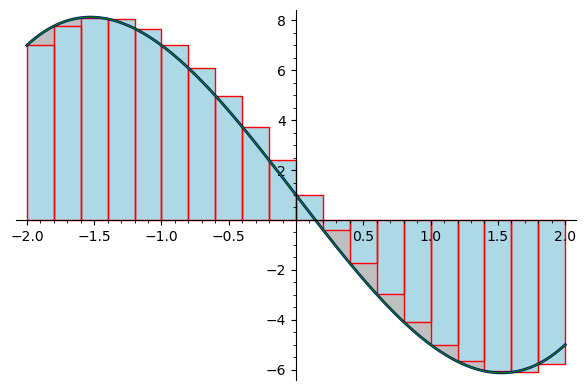

In [168]:
f(x)=x^3-7*x+1
a=-2
b=2
n=20
### r=0 for a left Riemann sum, r=1 for a right Riemman sum, r=1/2 for a middle on
r=0
I=integral(f(x), x, a,  b).n()
delta=(b-a)/n; rdelta=r*delta; xk=a; L=[]; S=0
for k in range(n):
    L= L + [(xk, 0)]
    y= f(xk+rdelta)
    S= S + y
    L= L + [(xk, y)]
    xk= xk + delta
    L= L + [(xk, y)]
S= delta*S.n() 
L= L + [(xk, 0)]
show("The actuall integral is given by:", I)
show("The approximate left Riemann Sum is given by:", S)
G=plot(f(x), (x, a, b), color="darkblue", thickness=2)
G=G+plot(f(x), (x, a, b), color="green", thickness=1, fill=True, fillcolor="grey")
G=G+polygon(L, edgecolor="red", color="lightblue")

G.show(aspect_ratio="automatic", figsize=6)


By increasing $n$ we can get a much better approximation: (similarly are treated the right or middle Riemann sums).

'The actuall integral is given by:' 4.00000000000000

'The approximate left Riemann Sum is given by:' 4.12000000000000

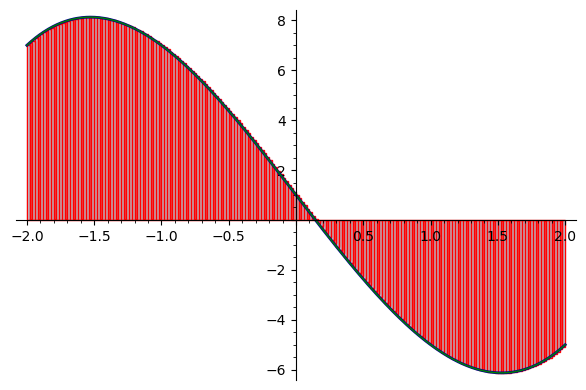

In [172]:
f(x)=x^3-7*x+1
a=-2
b=2
n=200
### r=0 for a left Riemann sum, r=1 for a right Riemman sum, r=1/2 for a middle on
r=0
I=integral(f(x), x, a,  b).n()
delta=(b-a)/n; rdelta=r*delta; xk=a; L=[]; S=0
for k in range(n):
    L= L + [(xk, 0)]
    y= f(xk+rdelta)
    S= S + y
    L= L + [(xk, y)]
    xk= xk + delta
    L= L + [(xk, y)]
S= delta*S.n() 
L= L + [(xk, 0)]
show("The actuall integral is given by:", I)
show("The approximate left Riemann Sum is given by:", S)
G=plot(f(x), (x, a, b), color="darkblue", thickness=2)
G=G+plot(f(x), (x, a, b), color="green", thickness=1, fill=True, fillcolor="grey")
G=G+polygon(L, edgecolor="red", color="lightblue")

G.show(aspect_ratio="automatic", figsize=6)


#### <span style='color:#2196f3'>**Example (computation of different types of integrals via SageMath)**</span> 

In [124]:
f = x^2  # define the function

# Indefinite integral
print('Get indefinite integral:')
show('First way via "integral()" function: ', integral(f, x))
show('Second way via "f.integral()" method: ', f.integral(x))
show('Third way via "f.integrate()" method: ', f.integrate(x))

print('\n')

# Definite integral
print('Get definite integral:')
a = 0  # define a (lower bound)
b = 5  # define b (upper bound)
show('First way via "integral()" function: ', integral(f, x, a, b))
show('Second way via "f.integral()" method: ', f.integral(x, a, b))
show('Third way via "f.integrate()" method: ', f.integrate(x, a, b))

Get indefinite integral:


'First way via "integral()" function: ' 1/3*x^3

'Second way via "f.integral()" method: ' 1/3*x^3

'Third way via "f.integrate()" method: ' 1/3*x^3



Get definite integral:


'First way via "integral()" function: ' 125/3

'Second way via "f.integral()" method: ' 125/3

'Third way via "f.integrate()" method: ' 125/3

Another example:

In [50]:
integral((x-1)/(x^2+9),x) 


-1/3*arctan(1/3*x) + 1/2*log(x^2 + 9)

If we want to have a Latex output style, we can add:

In [52]:
show(_)

-1/3*arctan(1/3*x) + 1/2*log(x^2 + 9)

#### <span style='color:#2196f3'>**Exercise**</span>

Find the antiderivative of the function $f(x) = x^3 + 2x^2 + 3x + 4$

#### Solution

In [125]:
integral(x^3 + 2*x^2 + 3*x + 4, x)

1/4*x^4 + 2/3*x^3 + 3/2*x^2 + 4*x

#### <span style='color:#2196f3'>**Exercise**</span>

Evaluate the definite integral of the function $f(x) = \frac{1}{x^2 + 4x + 5}$ from $x=0$ to $x=1$ 

#### Solution:

In [126]:
f = (x^2 + 4*x + 5)
show('Indef integral = ', f.integral(x))
show('Answer:', f.integrate(x, 0, 1 ))

'Indef integral = ' 1/3*x^3 + 2*x^2 + 5*x

'Answer:' 22/3

#### <span style='color:#2196f3'>**Exercise**</span>

Find the integral of the function 
$$f(x) = \frac{2x^3 + 3x^2 - 4x + 1}{x^2 + 1}.$$

#### Solution:

In [127]:
integral((2*x^3 + 3*x^2 - 4*x + 1) / (x^2 + 1), x)

x^2 + 3*x - 2*arctan(x) - 3*log(x^2 + 1)

#### <span style='color:#2196f3'>**Exercise**</span>

Calculate the definite integral of the function 
$$f(x) = \frac{\operatorname{ln}(x)}{x}$$
from $x=1$ to $x=e$ 

#### Solution:

In [128]:
f(x) = ln(x) / x
f.integral(x, 1, e)

1/2

#### <span style='color:#2196f3'>**Exercise**</span>

Check the integration by parts formula
$$\int_a^b f(x) g'(x) dx = f(b)g(b) - f(a)g(a) - \int_a^b f'(x) g(x) dx $$
for $f(x) = sin(x), g(x) = x^2$ and $a = 0, b = \frac{\pi}{2}$.

#### Solution:



In [129]:
f = sin(x)
g = x^2

a = 0
b = pi/2

LHS = integral(f*diff(g,x), x, a , b)
RHS = f(x=b)*g(x=b) - f(x=a)*g(x=a) - integral(diff(f,x)*g, x, a , b)

print(f'Left hand side = {LHS}')
print(f'Right hand side = {RHS}')

Left hand side = 2
Right hand side = 2


It is important to understand that Sage can also handle definite integrals involving variables, as in the case of derivatives.
Let us treat such an example.

#### <span style='color:#2196f3'>**Exercise**</span>

Compute the integral 
$$
I=\displaystyle\int_{0}^{1}(ax^3+bx^2+cx+d)\,dx\,.
$$

#### Solution:

This is an application of symbolic variables as first we should introduce the variables $a, b, c, d$.

In [60]:
var("a, b, c, d")
I=integral(a*x^3+b*x^2+c*x+d, x, 0, 1)
show("The integral I is given in tersm of the parameteres a, b, c, d, as follows I=", I)

'The integral I is given in tersm of the parameteres a, b, c, d, as follows I=' 1/4*a + 1/3*b + 1/2*c + d

#### <span style='color:#2196f3'>**Fundamental Theorem of  Integral Calculus - applications **</span> 
Let us now discuss a few tasks related to the fundamental theorem of calculus, see Chapter 6 on the BG book for details. 

Here we only recall that given some continuous function $f : [a, b]\to\mathbb{R}$, defined on a finite interval $[a, b]$, we can introduce the function
$$
F(x)=\int_{a}^{x}f(t)dt\,, \quad x\in[a, b]\,.
$$

Its derivative at $x$ is given by $F'(x)=f(x)$.


#### <span style='color:#2196f3'>**Exercise**</span>
Introduce in SageMath the fucntion

$$
F(x)=\int_{0}^{x}\frac{e^{t^2}}{(t^2+1)}\,dt\,.
$$

Next derive the derivative of $F$ and compute $F'(1)$. 

#### Solution:

In [102]:
var("x, t")
f(t)=e^(t^2)/(t^2 + 1)
F(x) = integral(f(t), t, 0, x)
show("The function F is given by F(x)=", F(x))
Fprime(x)=diff(F(x), x)
show("The derivative of F is given by F'(x)=", Fprime(x))
show("The value of F'(1) is given by:", Fprime(1))

'The function F is given by F(x)=' integrate(e^(t^2)/(t^2 + 1), t, 0, x)

"The derivative of F is given by F'(x)=" e^(x^2)/(x^2 + 1)

"The value of F'(1) is given by:" 1/2*e

Be aware that in SageMathCell in order to obtain the result posed above we shoud include in our program the command 
${\tt{assume(x>0)}}$. 

In fact below we describe a bit quicker way to introduce $F$.



In [95]:
# Define the variables x and t
var('x, t')
assume(x>0)
# Define the function f(t)
f = exp(t^2) / (t^2 + 1)
# Define the integral function F(x)
F = integral(f, t, 0, x)
# Display the function F(x)
show(F)


integrate(e^(t^2)/(t^2 + 1), t, 0, x)

Or finally one could type

In [96]:
var("x, t")
f(t)=e^(t^2)/(t^2 + 1)
F=f.integral(t, 0, x); show(F)

integrate(e^(t^2)/(t^2 + 1), t, 0, x)

In [98]:
Fprime=F.derivative(x); show(Fprime)

e^(x^2)/(x^2 + 1)

However, in this case we cannot type ${\tt{Fprime(1)}}$ as we will get an error (try it!).

Using this approach, to evaluate $F'(1)$ we should type the following:

In [101]:
show(F.derivative(x)(x=1))

1/2*e

#### <span style='color:#2196f3'>**Exercise for practice**</span>

1) Use Sage to evaluate  the derivatives $G'(1)$ and $G''(1)$, where

$$
G(x)=\int_{1}^{x} te^{3t}\,dt\,.
$$
Next confirm Sage's result by hand.

2) Let $f(t)=t-t^2$ with $t\geq 0$, and $F(x)=\displaystyle\int_{0}^{x} f(t)\,dt$. Find the positive real $x$ where $F(x)$ starts decreasing. 

#### <span style='color:#2196f3'>**Remark**</span>
Some functions do not have elementary antiderivatives. For example, consider
the integral
$$
I=\int_{0}^{1}e^{-x^2}\,dx\,.
$$


In [70]:
show(integral(e^(-x^2),x,0,1))

1/2*sqrt(pi)*erf(1)

Let us ask Sage for the error function ${\tt{erf}}$

In [72]:
erf?

Type:            LazyImport
String form:     erf
File:            /ext/sage/9.7/src/sage/misc/lazy_import.pyx
Docstring:      
   The error function.

   The error function is defined for real values as

      \operatorname{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}
      dt.

   This function is also defined for complex values, via analytic
   continuation.

   EXAMPLES:

   We can evaluate numerically:

      sage: erf(2)
      erf(2)
      sage: erf(2).n()
      0.995322265018953
      sage: erf(2).n(100)
      0.99532226501895273416206925637
      sage: erf(ComplexField(100)(2+3j))
      -20.829461427614568389103088452 + 8.6873182714701631444280787545*I

   Basic symbolic properties are handled by Sage and Maxima:

      sage: x = var("x")
      sage: diff(erf(x),x)
      2*e^(-x^2)/sqrt(pi)
      sage: integrate(erf(x),x)
      x*erf(x) + e^(-x^2)/sqrt(pi)

   ALGORITHM:

   Sage implements numerical evaluation of the error function via the
   "erf()" function from mpmath. S

Hence, according to Sage the error function is defined as
$$
\operatorname{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}
      dt.
      $$

Let us evaluate this fucntion at some points:

In [73]:
erf(2)

erf(2)

In [74]:
erf(2).n()

0.995322265018953

Finally, we could directly aapproximate the initial intregral based on the ${\tt{N()}}$ function. 

In the final chapter we will see that Sage provides another built-in method  to approximate integrals numerically.

In [71]:
N(integral(e^(-x^2),x,0,1))


0.746824132812427

Another example where we get an expression in terms of the error function is for example the following integral:

$$
\int\sin(x^2)\, dx\,.
$$

In [173]:
show(integral(sin(x^2), x))

1/16*sqrt(pi)*((I + 1)*sqrt(2)*erf((1/2*I + 1/2)*sqrt(2)*x) + (I - 1)*sqrt(2)*erf((1/2*I - 1/2)*sqrt(2)*x) - (I - 1)*sqrt(2)*erf(sqrt(-I)*x) + (I + 1)*sqrt(2)*erf((-1)^(1/4)*x))

In [0]:
I=integral(sin(x^2), x)
N(I) #this will produce an error, try it!
I.n() #similarly we will get an error

#### <span style='color:#2196f3'>**An example of numerical integration in SageMath**</span>

Compute the integral

$$

I=\int_{1}^{2} \frac{ \sqrt{x+\sqrt{1+x^2}}}{x} \,.

$$

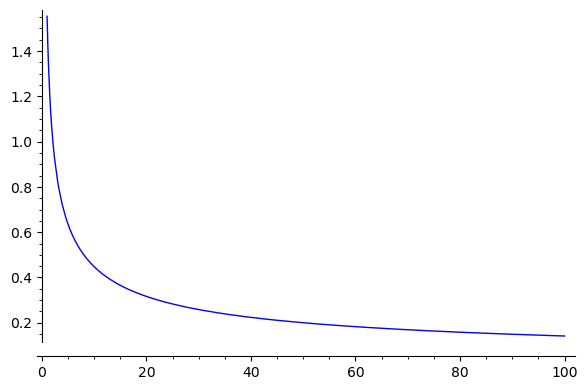

1/8*sqrt(x)*gamma(1/4)*gamma(-1/4)^2*hypergeometric((-1/4, -1/4, 1/4), (1/2, 3/4), -1/x^2)/(pi*gamma(3/4))

In [54]:
f(x)=sqrt(x+sqrt(1+x^2))/x
fplot=f.plot(x, 1, 100)
show(fplot)
fint=integral(f(x), x)
show(fint) # we will get a very complicated expression depending on Gamma function

Let us introduce  and have a look at the so called   Gamma function.


In [70]:
var("x, t")
assume(x>0)
Gamma(x)=integral(t^(x-1)*e^(-t), t, 0, oo)
show(Gamma(x))
Gamma(0)

gamma(x)

Infinity

In [80]:
Gamma(0)==gamma(0)

Infinity == Infinity

Hence our Gamma function at least at $x=0$ gives the same result with the built-in function in Sage that represents the $\Gamma$ function.

Let us try to plot our function for certain $x$:

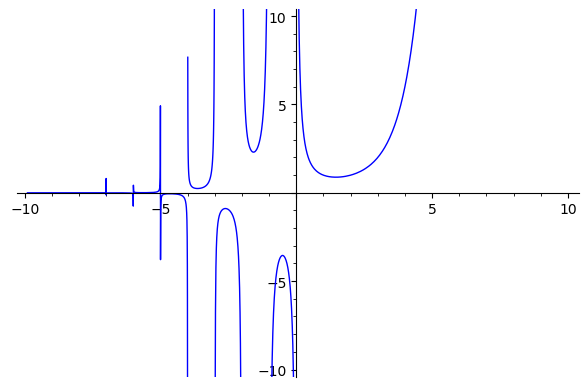

In [81]:
plot(Gamma, x, -10, 10, ymin=-10, ymax=10, detect_poles="True")

We can   plot in a better way the Gamma function by importing in it!

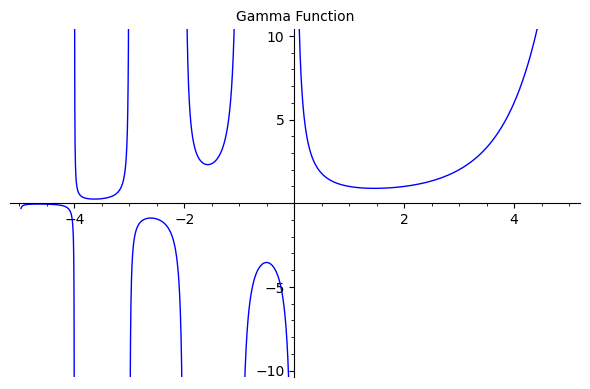

In [78]:
# Import the Gamma function
from sage.functions.gamma import gamma

# Define the range for the plot
x_range = (-5, 5)  # Avoid zero because Gamma(x) has a singularity at x=0

# Plot the Gamma function
plot(gamma(x), x_range, title="Gamma Function", color='blue', ymin=-10, ymax=10, detect_poles="True")


Type ${\tt{gamma?}}$ to learn more information for the Gamma function in SageMath and see also Chapter 6 on the BG book.

In [79]:
gamma(0)

Infinity


Let us now return to our initial problem. One way to obtain a meaninfull  result  is to apply the following method:


In [59]:
(integral(f(x), x, 1, 2)).n()

1.23692911795883

Let us now use Sage via the built-in  function ${\tt{numerical\_integral}}$. This approximates the value of an integral on an interval.  

In [60]:
numerical_integral(f(x), 1, 2) # this will provide an approximation of the integral between 0 and 1

(1.2369291179588335, 1.3732671865871831e-14)

This provides a good approximation, as the error (the second component in Sage's output above is very small). However, observe that:

In [61]:
(integral(f(x), x, 0, 1)).n()

2.72269476898150

But:

In [62]:
numerical_integral(f(x), 0, 1)

(69.99281746999927, 13.112269516493129)

So in this case the ${\tt{numerical_integral}}$ method provides  a very big error and the estimation is wrong, and not acceptable. We will discuss  mathematical techniques of numerical integration and how we can implement them using Sage in our final chapter, the final week of the course.

#### <span style='color:#2196f3'>**Improper integrals**</span>

Compute the integral

$$

I=\int_{0}^{\infty}\frac{\sin(x)}{x}\, dx\,.

$$

In [96]:
I=integral(sin(x)/x, x, 0, infinity)
show("The integral in question equals", ":",  I)

'The integral in question equals' ':' 1/2*pi

In [99]:
numerical_integral(sin(x)/x,  0, oo)

(1.902348806239928, 1.6980673032591547)

Let us compare this result with the previous result:

In [100]:
n(pi/2)

1.57079632679490

Thus, the ${\tt{numerical\_integral}}$ method is not very accurate in this case, and has a very high error, close to 1.7.